In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IPL Complete Data Analysis: BOWLER VS BATSMAN🏏📊🎉🏆**

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading Match data set 
df_match= pd.read_csv("matches.csv")
df_match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
#Loading Deliveries data set 
df_del= pd.read_csv("deliveries.csv")
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


# **Data Health Check**

In [7]:
df_del.info() #Checking data info of Delivery data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [8]:
df_del.duplicated().sum()  #Checking duplicate rows

np.int64(0)

In [9]:
df_match.info() #Checking data info of Match 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [10]:
df_match.duplicated().sum()  #Checking duplicate rows

np.int64(0)

In [11]:
#checking city columns with venue columns so that, i can identify the location and fill a/c where value is NaN 
df_match[df_match['city'].isna()]['venue'].unique()

array(['Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

Now According to venue, we can fill the city value with Sharjah and Dubai 

# **Data Preprocessing**

In [12]:
# Filling missing city values based on venue
df_match.loc[(df_match['city'].isna()) & (df_match['venue'] == 'Sharjah Cricket Stadium'), 'city'] = 'Sharjah'
df_match.loc[(df_match['city'].isna()) & (df_match['venue'] == 'Dubai International Cricket Stadium'), 'city'] = 'Dubai'
df_match['city'].isnull().sum()

np.int64(0)

In [13]:
#replacing season in correct format
df_match.replace({'season': {"2020/21": "2020", "2009/10": "2010", "2007/08": "2008"}}, inplace=True)

In [14]:
#Replacing Team old name to new name 
team_map ={"Mumbai Indians":"Mumbai Indians",
          "Chennai Super Kings":"Chennai Super Kings",
          "Kolkata Knight Riders":"Kolkata Knight Riders",
          "Royal Challengers Bangalore":"Royal Challengers Bangalore",
          "Royal Challengers Bengaluru":"Royal Challengers Bangalore",
          "Rajasthan Royals":"Rajasthan Royals",
          "Kings XI Punjab":"Kings XI Punjab",
          "Punjab Kings":"Kings XI Punjab",
          "Sunrisers Hyderabad":"Sunrisers Hyderabad",
          "Deccan Chargers":"Sunrisers Hyderabad",
          "Delhi Capitals":"Delhi Capitals",
          "Delhi Daredevils":"Delhi Capitals",
          "Gujarat Titans":"Gujarat Titans",
          "Gujarat Lions":"Gujarat Titans",
          "Lucknow Super Giants":"Lucknow Super Giants",
          "Pune Warriors":"Pune Warriors",
          "Rising Pune Supergiant":"Pune Warriors",
          "Rising Pune Supergiants":"Pune Warriors",
          "Kochi Tuskers Kerala":"Kochi Tuskers Kerala"}

#For Match table 
df_match['team1']= df_match['team1'].map(team_map)
df_match['team2']= df_match['team2'].map(team_map)
df_match['winner']= df_match['winner'].map(team_map)
df_match['toss_winner']= df_match['toss_winner'].map(team_map)

#For Deliverise Tables 
df_del['batting_team']= df_del['batting_team'].map(team_map)
df_del['bowling_team']= df_del['bowling_team'].map(team_map)

# **Trend of Total Matches Over Seasons**

In [15]:
#Trend of Total Matches Over Seasons
df_match['season'].value_counts().to_frame().T

season,2013,2022,2012,2023,2011,2024,2019,2016,2010,2021,2020,2014,2018,2017,2015,2008,2009
count,76,74,74,74,73,71,60,60,60,60,60,60,60,59,59,58,57


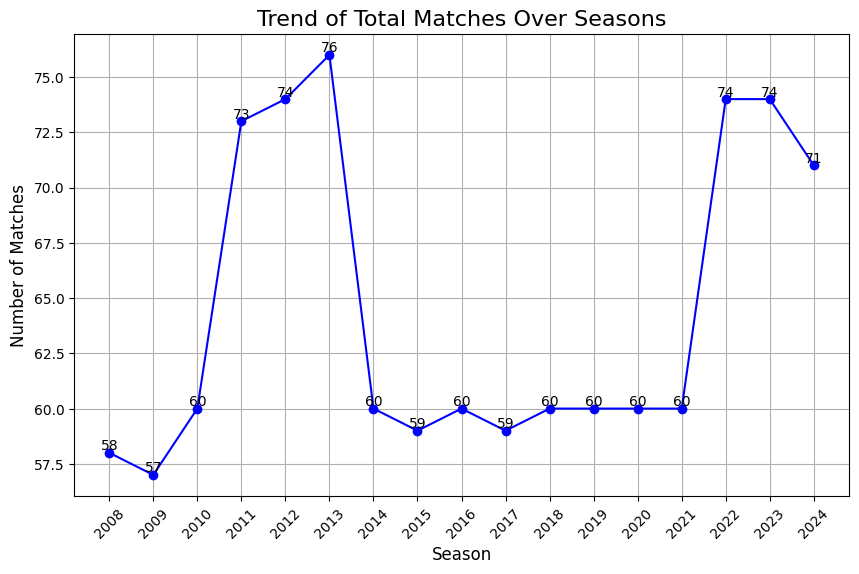

In [16]:
import matplotlib.pyplot as plt

season_counts = df_match['season'].value_counts().sort_index()

# Ploting the trend as a line chart
plt.figure(figsize=(10, 6))  
plt.plot(season_counts.index, season_counts.values, marker='o', linestyle='-', color='blue')

# Adding titles and labels
plt.title('Trend of Total Matches Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Annotating each data point with the value
for i, value in enumerate(season_counts.values):
    plt.text(season_counts.index[i], value, str(value), fontsize=10, ha='center', va='bottom')
plt.xticks(rotation=45)  
plt.grid(True)           
plt.show()

# **Matches Hosted by Each City**

In [17]:
#Matches Hosted by Top 10 City 
df_match['city'].value_counts().head(10)

city
Mumbai        173
Kolkata        93
Delhi          90
Chennai        85
Hyderabad      77
Bangalore      65
Chandigarh     61
Jaipur         57
Pune           51
Dubai          46
Name: count, dtype: int64

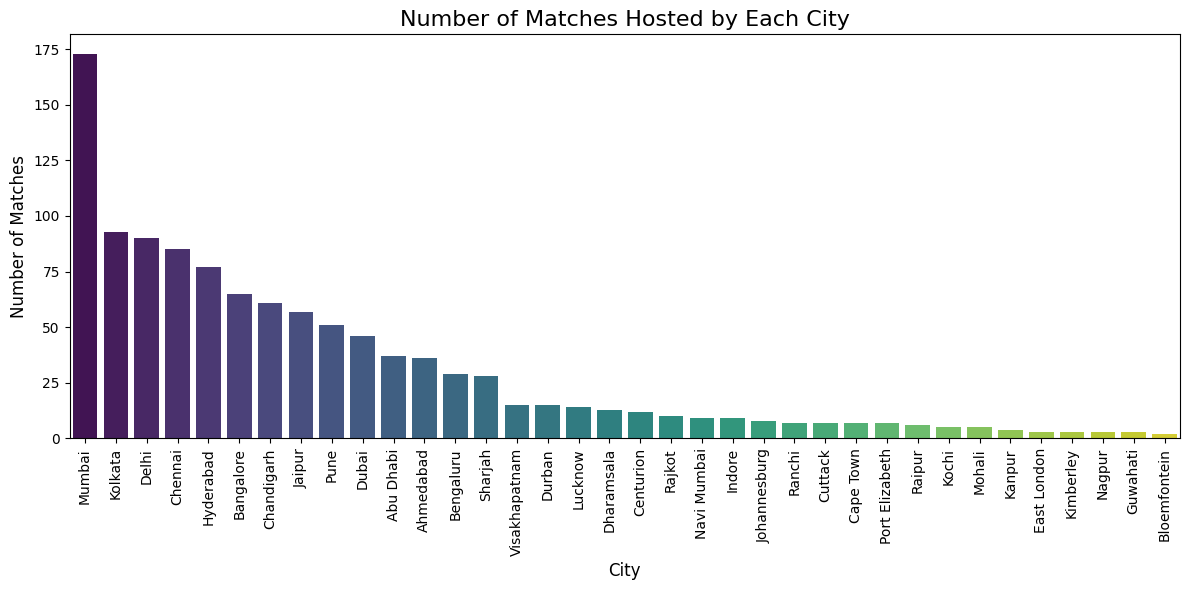

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace NaN values in 'city' column with 'Unknown' and count the occurrences
city_counts = df_match['city'].replace(np.nan, 'Unknown').value_counts()

# Creating a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')

# Add titles and labels
plt.title('Number of Matches Hosted by Each City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

# **Distribution of Target Runs**

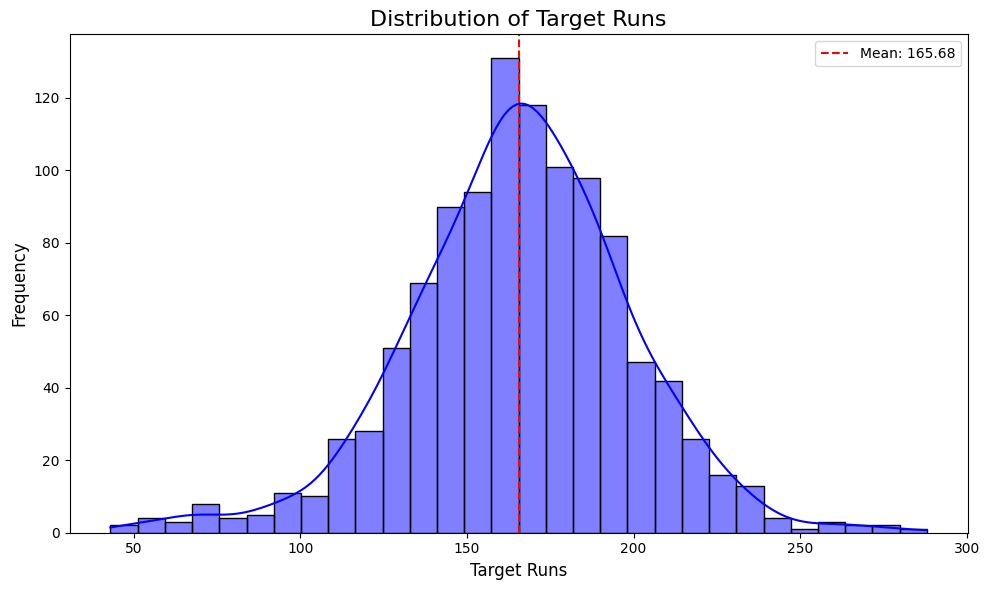

In [20]:
# Calculating the mean of 'target_runs'
mean_target_runs = df_match['target_runs'].mean()

# Creating histogram plot to show the distribution 
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df_match['target_runs'].dropna(), bins=30, kde=True, color='blue') 

# Adding a vertical line for the mean
plt.axvline(mean_target_runs, color='red', linestyle='--', label=f'Mean: {mean_target_runs:.2f}')

# Adding titles and labels
plt.title('Distribution of Target Runs', fontsize=16)
plt.xlabel('Target Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()

**Average Target Run in IPL Matches**

In [21]:
#Average Target Run in IPL Matches
print(mean_target_runs)

165.68406593406593


# **Trend of Average Target Runs by Season**

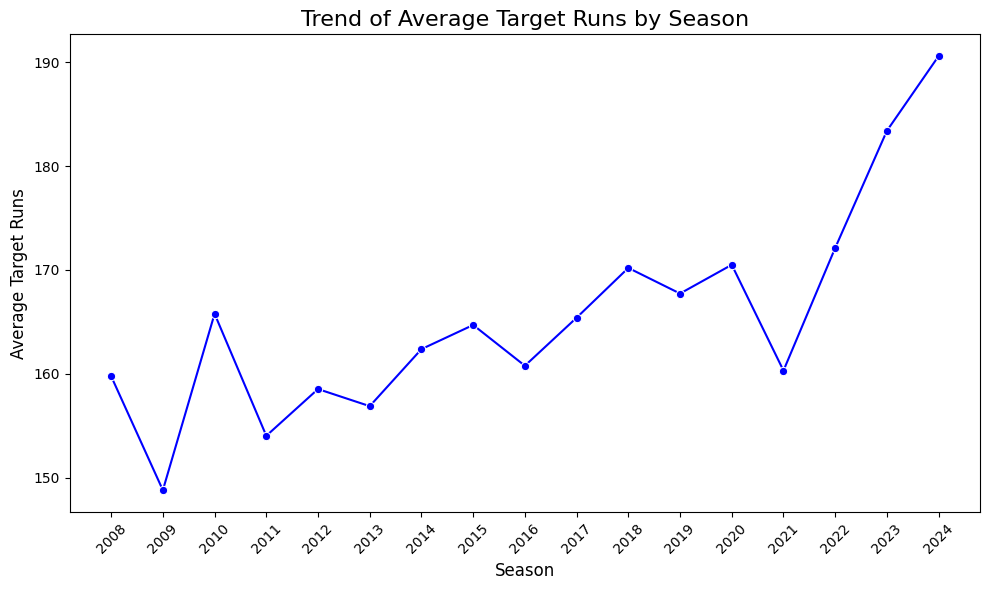

In [22]:
# avg target run by season 
avg_run_byseason = pd.pivot_table(data=df_match, index='season', values='target_runs', aggfunc='mean')
avg_run_byseason.reset_index(inplace=True)

# Creating line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_run_byseason, x='season', y='target_runs', marker='o', color='blue')

# Adding titles and labels
plt.title('Trend of Average Target Runs by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Target Runs', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# **Distribution of Match Results**

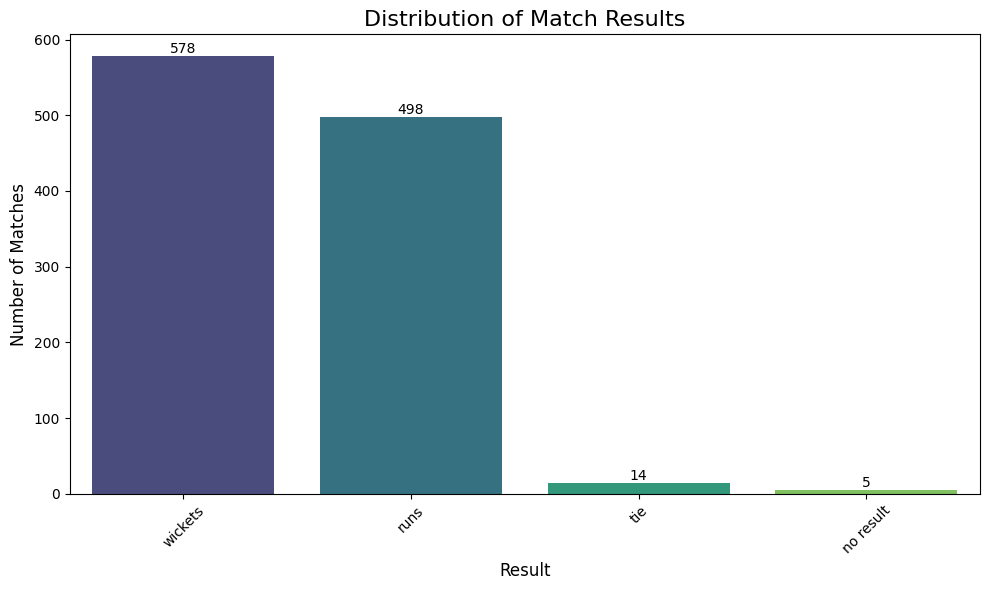

In [23]:
# Distribution of Match Results
result_distribution = df_match['result'].value_counts()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=result_distribution.index, y=result_distribution.values, palette='viridis')

# Adding titles and labels
plt.title('Distribution of Match Results', fontsize=16)
plt.xlabel('Result', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Showing the values on top of the bars
for index, value in enumerate(result_distribution):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# **Distribution of Result Margin Won by Runs & Wickets**

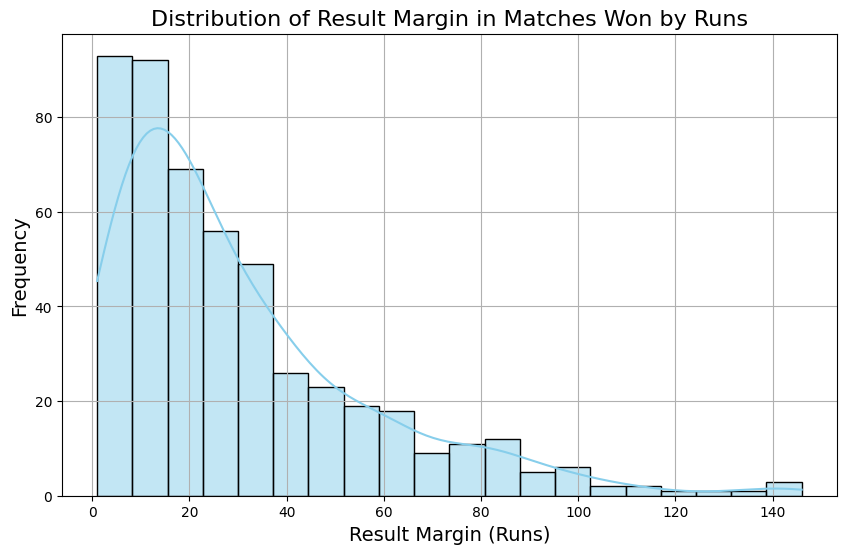

In [24]:
# distribution of results won by runs
runs_margin = df_match[df_match['result'] == 'runs']['result_margin']

# Ploting the distribution of result margins using histogram 
plt.figure(figsize=(10, 6))
sns.histplot(runs_margin, bins=20, kde=True, color='skyblue')

# Adding titles and labels
plt.title('Distribution of Result Margin in Matches Won by Runs', fontsize=16)
plt.xlabel('Result Margin (Runs)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

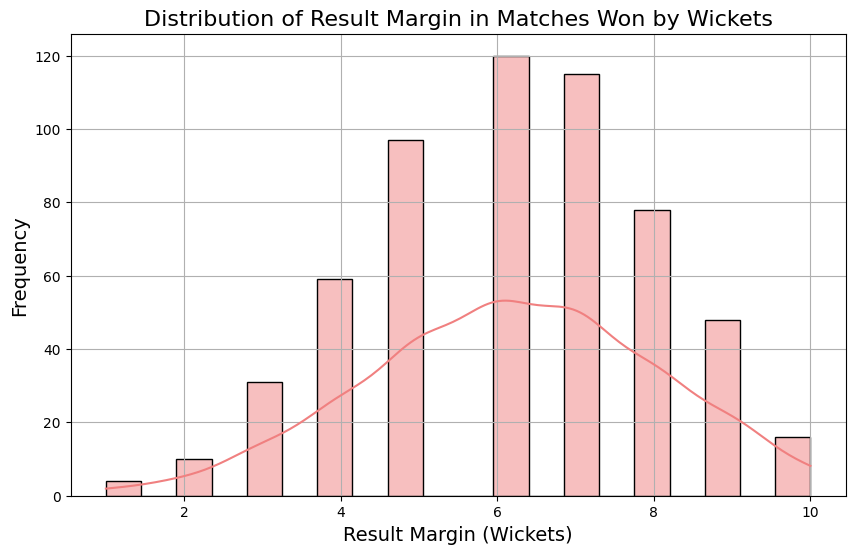

In [25]:
# distribution of results won by wickets
wickets_margin = df_match[df_match['result'] == 'wickets']['result_margin']

# Plot the distribution of result margins using histogram
plt.figure(figsize=(10, 6))
sns.histplot(wickets_margin, bins=20, kde=True, color='lightcoral')

# Adding titles and labels
plt.title('Distribution of Result Margin in Matches Won by Wickets', fontsize=16)
plt.xlabel('Result Margin (Wickets)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

# **Average Result Margin by Season (Runs vs Wickets)**

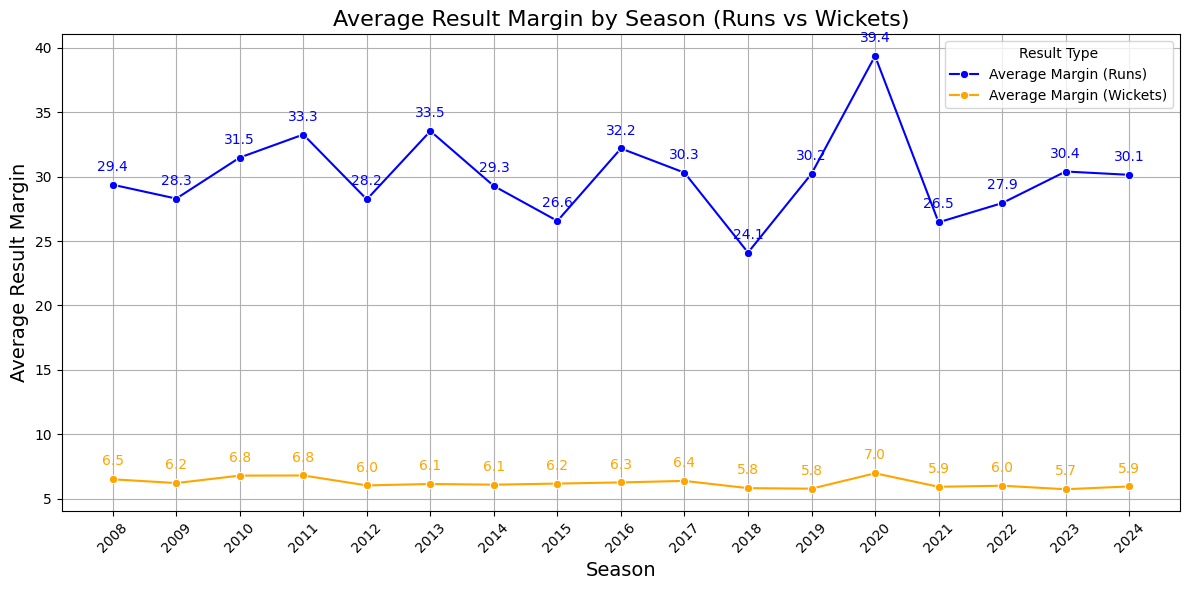

In [26]:
# average result margin across seasons for both runs and wickets
result_margins = df_match[(df_match['result'] == 'runs') | (df_match['result'] == 'wickets')]

# Creating a pivot table for average result margins by season and result type
avg_result = pd.pivot_table(
    data=result_margins, 
    index='season', 
    columns='result', 
    values='result_margin', 
    aggfunc='mean'
)

# Resetting the index for plotting
avg_result.reset_index(inplace=True)

# Plotting the average result margins
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_result, x='season', y='runs', marker='o', label='Average Margin (Runs)', color='blue')
sns.lineplot(data=avg_result, x='season', y='wickets', marker='o', label='Average Margin (Wickets)', color='orange')

# Adding titles and labels
plt.title('Average Result Margin by Season (Runs vs Wickets)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Result Margin', fontsize=14)
plt.legend(title='Result Type')

# Showing the values on markers
for index, row in avg_result.iterrows():
    plt.annotate(f'{row["runs"]:.1f}', 
                 (row['season'], row['runs']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='blue')
    
    plt.annotate(f'{row["wickets"]:.1f}', 
                 (row['season'], row['wickets']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='orange')

plt.grid()
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


# **Percentage of Matches Won by Toss Decision**

  toss_decision  wins  percentage
0           bat   390   35.779817
1         field   700   64.220183


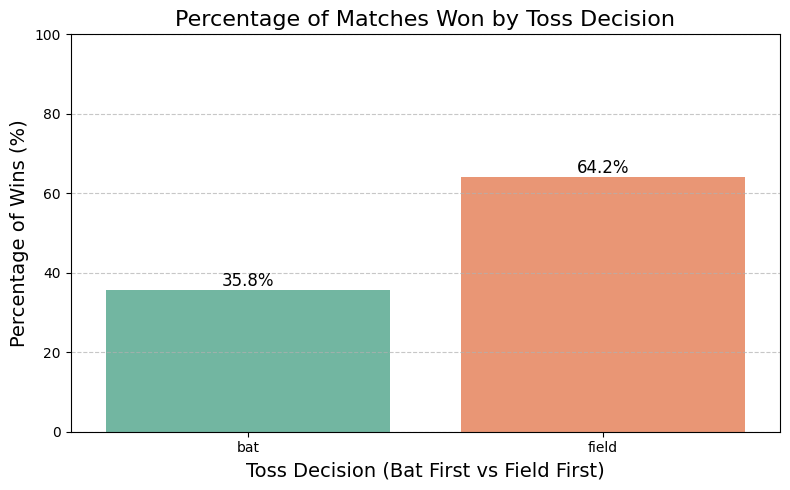

In [27]:

# Removing rows where the winner is missing
df_clean = df_match.dropna(subset=['winner'])

# Grouping by toss decision and counting how often each decision leads to a win
wins_by_decision = df_clean.groupby('toss_decision').size().reset_index(name='wins')

# Calculating the percentage of matches won by teams batting first vs. fielding first
total_matches = df_clean.shape[0]
wins_by_decision['percentage'] = (wins_by_decision['wins'] / total_matches) * 100

# Displaying the result
print(wins_by_decision)

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(data=wins_by_decision, x='toss_decision', y='percentage', palette='Set2')

# Adding titles and labels
plt.title('Percentage of Matches Won by Toss Decision', fontsize=16)
plt.xlabel('Toss Decision (Bat First vs Field First)', fontsize=14)
plt.ylabel('Percentage of Wins (%)', fontsize=14)

# Adding values on top of the bars
for index, row in wins_by_decision.iterrows():
    plt.text(index, row['percentage'] + 1, f'{row["percentage"]:.1f}%', 
             ha='center', fontsize=12)

plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()

# **Number of Super Overs Over Season**

  season  super_over_count
0   2009                 1
1   2010                 1
2   2013                 2
3   2014                 1
4   2015                 1
5   2017                 1
6   2019                 2
7   2020                 4
8   2021                 1


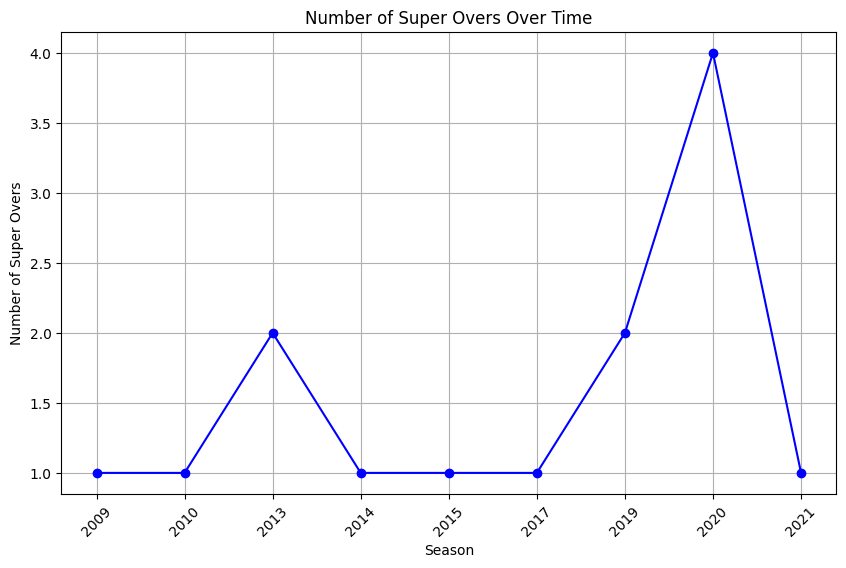

In [28]:
# Filtering matches where super_over is 'Y'
super_over_matches = df_match[df_match['super_over'] == 'Y']

# Group by season and counting the number of super overs
super_over_by_season = super_over_matches.groupby('season').size().reset_index(name='super_over_count')

# Displaying the results
print(super_over_by_season)

# Ploting the number of super overs over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(super_over_by_season['season'], super_over_by_season['super_over_count'], marker='o', color='b')
plt.title('Number of Super Overs Over Time')
plt.xlabel('Season')
plt.ylabel('Number of Super Overs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **Top 10 Umpires by Match Counts**

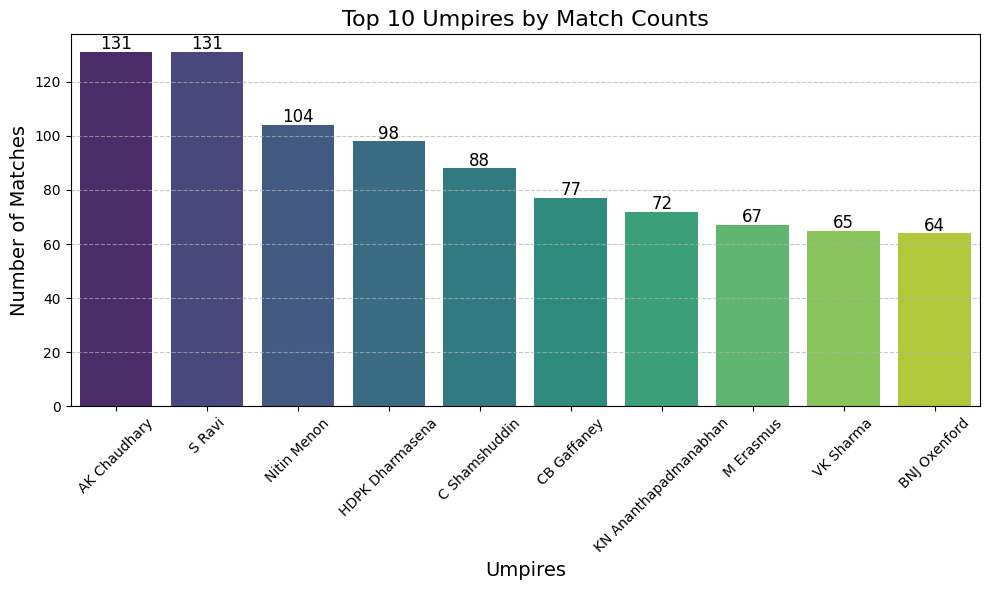

In [29]:
# Combine umpire1 and umpire2 counts by adding the series
umpire_counts = df_match['umpire1'].value_counts().add(df_match['umpire2'].value_counts(), fill_value=0)

# Sorting by the total count in descending order
umpire_counts = umpire_counts.sort_values(ascending=False)

# Top 10 umpires
top_umpires = umpire_counts.head(10)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_umpires.index, y=top_umpires.values, palette='viridis')

# Adding titles and labels
plt.title('Top 10 Umpires by Match Counts', fontsize=16)
plt.xlabel('Umpires', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding values on top of the bars
for index, value in enumerate(top_umpires.values):
    plt.text(index, value + 1, int(value), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()

# **Match Statistics: Total Matches Played and Wins by Team**

In this section calculating the total matches played, total wins, wins when chasing a target, and wins when batting first for each team. The results are merged into a single DataFrame for easier analysis.


In [30]:
import pandas as pd
#total match played by team 
total_matches= (df_match['team1'].value_counts()+df_match['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
# Count of wins for each team
total_wins = df_match['winner'].value_counts().rename_axis('Team').reset_index(name='Total_Wins')

# Count of wins when chasing a target
team_chasing = df_match[df_match['toss_decision'] == 'field']['winner'].value_counts().rename_axis('Team').reset_index(name='Chasing_Wins')

# Count of wins when batting first
team_batting_first = df_match[df_match['toss_decision'] == 'bat']['winner'].value_counts().rename_axis('Team').reset_index(name='Batting_First_Wins')


# Merge all the DataFrames
merged_df = total_matches.merge(total_wins,on='Team',how='outer') \
    .merge(team_chasing, on='Team', how='outer') \
    .merge(team_batting_first, on='Team', how='outer') 
    

# Fill NaN values with 0
merged_df= merged_df.fillna(0)
#sorting by total match played
merged_df.sort_values(by='Total_Match_Played', ascending=False, inplace=True)


In [28]:
# Display the final merged DataFrame
merged_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Mumbai Indians,261,144,90,54.0
Chennai Super Kings,238,138,75,63.0
Kolkata Knight Riders,251,131,81,50.0
Royal Challengers Bangalore,255,123,85,38.0
Sunrisers Hyderabad,257,117,73,44.0
Delhi Capitals,252,115,73,42.0
Kings XI Punjab,246,112,84,28.0
Rajasthan Royals,221,112,69,43.0
Gujarat Titans,75,41,30,11.0


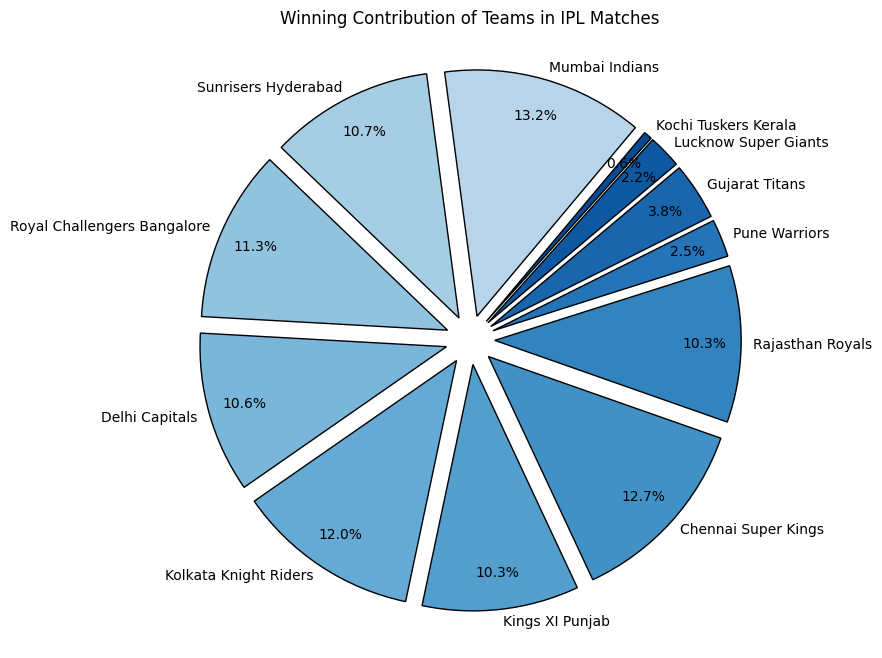

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a pie chart for showing wining destribution of team in all wining matches 
plt.figure(figsize=(8, 8))
explode = [0.1] * len(merged_df)  
plt.pie(
    merged_df['Total_Wins'],  
    labels=merged_df['Team'],  
    autopct='%1.1f%%',  
    startangle=50,  
    colors=plt.cm.Blues(np.linspace(0.3, 0.9, len(merged_df))),  
    wedgeprops={'edgecolor': 'black'},  
    explode=explode,  
    pctdistance=0.85,  
    labeldistance=1.05  
)

plt.title('Winning Contribution of Teams in IPL Matches')

# Show the pie chart
plt.show()


# **Percentage Match Statistics: Wins by Team**

In [32]:
# Create a copy of the merged DataFrame to keep the original intact
percentage_df = merged_df.copy()

# Convert columns to percentage
percentage_df['Total_Wins'] = (percentage_df['Total_Wins'] / percentage_df['Total_Match_Played']) * 100
percentage_df['Chasing_Wins'] = (percentage_df['Chasing_Wins'] / merged_df['Total_Wins']) * 100
percentage_df['Batting_First_Wins'] = (percentage_df['Batting_First_Wins'] / merged_df['Total_Wins']) * 100


In [33]:
percentage_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Chennai Super Kings,238,57.983193,54.347826,45.652174
Mumbai Indians,261,55.172414,62.500000,37.500000
Gujarat Titans,75,54.666667,73.170732,26.829268
Lucknow Super Giants,44,54.545455,75.000000,25.000000
Kolkata Knight Riders,251,52.191235,61.832061,38.167939
Rajasthan Royals,221,50.678733,61.607143,38.392857
Royal Challengers Bangalore,255,48.235294,69.105691,30.894309
Delhi Capitals,252,45.634921,63.478261,36.521739
Kings XI Punjab,246,45.528455,75.000000,25.000000


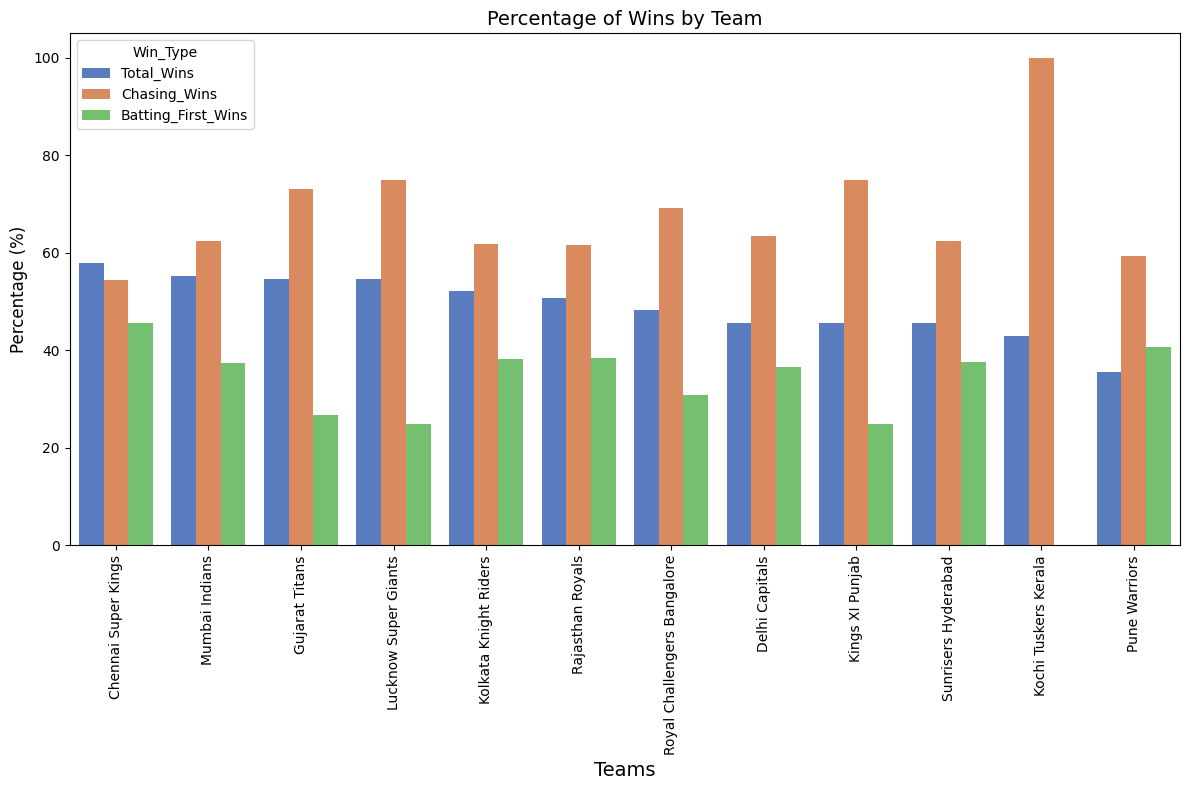

In [34]:
import seaborn as sns

# Melting the DataFrame for easier plotting
melted_df = percentage_df.sort_values(by='Total_Wins', ascending=False).melt(id_vars='Team', 
                                value_vars=['Total_Wins', 'Chasing_Wins', 'Batting_First_Wins'],
                                var_name='Win_Type', 
                                value_name='Percentage')

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df, x='Team', y='Percentage', hue='Win_Type', palette='muted')

# Adding labels and title
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Percentage of Wins by Team', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# **Match Outcomes: Analysis of Toss Winners and Their Success**

In this section, i am analyzing the outcomes based on toss winners, including the number of matches won by teams that won the toss, along with their performance based on the toss decision (batting first or fielding first). The results are aggregated into a merged DataFrame.


In [35]:
total_matches= (df_match['team1'].value_counts()+df_match['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")

#total toss winner teams
toss_winners=df_match['toss_winner'].value_counts().rename_axis('Team').reset_index(name='Toss_Win')

# Create the pivot table for toss decisions
team_wins_pivot = pd.pivot_table(
    data=df_match[df_match['toss_winner'] == df_match['winner']],
    index='winner',
    columns='toss_decision',
    aggfunc='size',
    fill_value=0
).rename_axis('Team').reset_index().rename(columns={'bat': 'Bat_first_win_After_Toss_Win','field':'Chasing_Win_After_Toss_Win'})

# Count of matches won by toss winners
toss_winner_matches = df_match[df_match['toss_winner'] == df_match['winner']]['winner'].value_counts().rename_axis('Team').reset_index(name='Toss_Win_Match_win')

# Merge all the DataFrames
merged_df2 = total_matches.merge(toss_winners, on='Team', how='outer') \
    .merge(toss_winner_matches, on='Team', how='outer') \
    .merge(team_wins_pivot, on='Team', how='outer') 
    

# Fill NaN values with 0
merged_df2= merged_df2.fillna(0)
#sorting by total match played
merged_df2.sort_values(by='Total_Match_Played', ascending=False, inplace=True)


In [37]:
# Display the final merged DataFrame
sorted_df = merged_df2.set_index('Team').sort_values(by='Toss_Win_Match_win', ascending=False)
sorted_df

,Total_Match_Played,Toss_Win,Toss_Win_Match_win,Bat_first_win_After_Toss_Win,Chasing_Win_After_Toss_Win
Team,,,,,
Mumbai Indians,261,143,78,30,48
Chennai Super Kings,238,122,75,35,40
Kolkata Knight Riders,251,122,68,20,48
Royal Challengers Bangalore,255,121,61,17,44
Delhi Capitals,252,130,61,18,43
Rajasthan Royals,221,120,60,18,42
Sunrisers Hyderabad,257,131,57,23,34
Kings XI Punjab,246,109,45,6,39
Gujarat Titans,75,37,24,3,21


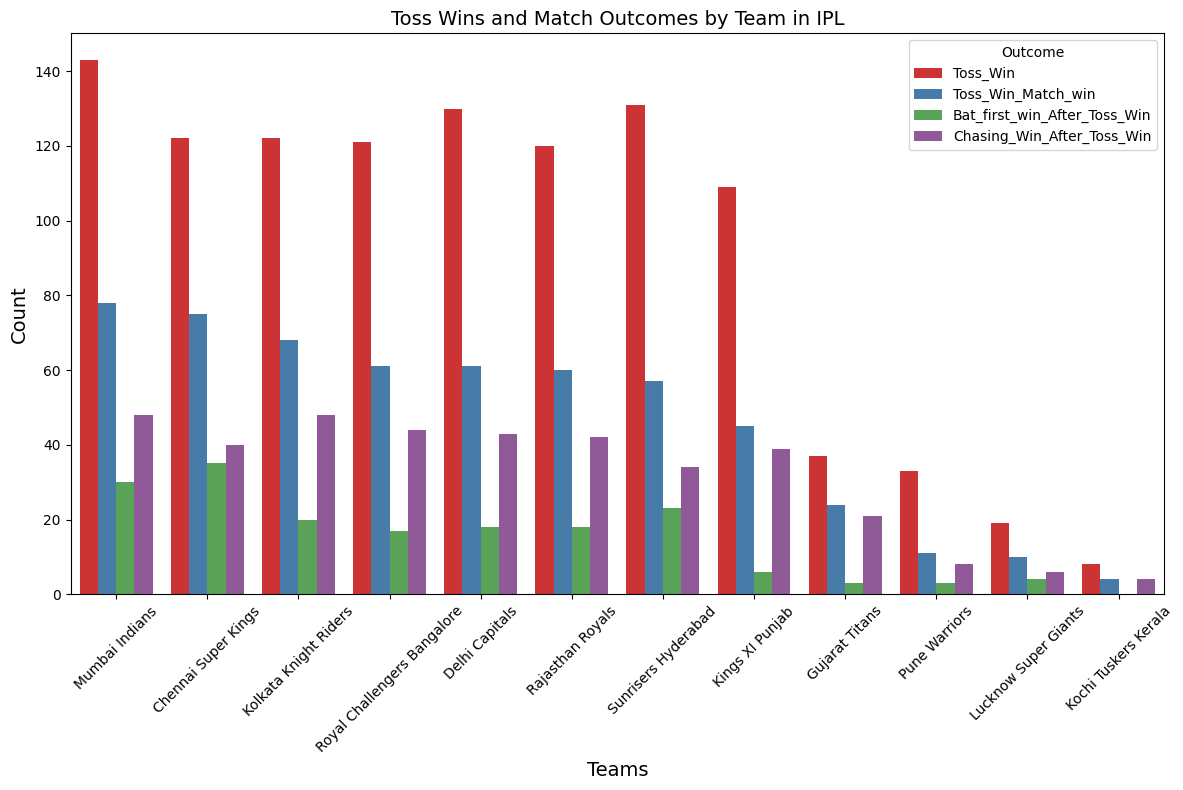

In [38]:
# Melting the DataFrame for easier plotting
melted_df = pd.melt(
    sorted_df.reset_index(),
    id_vars=['Team'], 
    value_vars=['Toss_Win', 'Toss_Win_Match_win', 'Bat_first_win_After_Toss_Win', 'Chasing_Win_After_Toss_Win'],
    var_name='Outcome',
    value_name='Count'
)

plt.figure(figsize=(12, 8))

# Creating the bar plot
sns.barplot(data=melted_df, x='Team', y='Count', hue='Outcome', palette='Set1')

# Adding labels and title
plt.xlabel('Teams',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Toss Wins and Match Outcomes by Team in IPL',fontsize=14)
plt.xticks(rotation=45)  
plt.legend(title='Outcome')
plt.tight_layout()  
plt.show()


# **Percentage Toss and Match Outcomes**


In [39]:
# Create a copy of the merged DataFrame to keep the original intact
percentage_df2 = merged_df2.copy()

percentage_df2['Toss_Win'] = (percentage_df2['Toss_Win'] / merged_df2['Total_Match_Played']) * 100
percentage_df2['Toss_Win_Match_win'] = (percentage_df2['Toss_Win_Match_win'] / merged_df2['Toss_Win']) * 100
percentage_df2['Bat_first_win_After_Toss_Win'] = (percentage_df2['Bat_first_win_After_Toss_Win'] / merged_df2['Toss_Win_Match_win']) * 100
percentage_df2['Chasing_Win_After_Toss_Win'] = (percentage_df2['Chasing_Win_After_Toss_Win'] / merged_df2['Toss_Win_Match_win']) * 100

In [40]:
# Display the DataFrame with percentages
percentage_df2.set_index('Team', drop=True).sort_values(by='Toss_Win_Match_win', ascending=False)

,Total_Match_Played,Toss_Win,Toss_Win_Match_win,Bat_first_win_After_Toss_Win,Chasing_Win_After_Toss_Win
Team,,,,,
Gujarat Titans,75,49.333333,64.864865,12.500000,87.500000
Chennai Super Kings,238,51.260504,61.475410,46.666667,53.333333
Kolkata Knight Riders,251,48.605578,55.737705,29.411765,70.588235
Mumbai Indians,261,54.789272,54.545455,38.461538,61.538462
Lucknow Super Giants,44,43.181818,52.631579,40.000000,60.000000
Royal Challengers Bangalore,255,47.450980,50.413223,27.868852,72.131148
Kochi Tuskers Kerala,14,57.142857,50.000000,0.000000,100.000000
Rajasthan Royals,221,54.298643,50.000000,30.000000,70.000000
Delhi Capitals,252,51.587302,46.923077,29.508197,70.491803


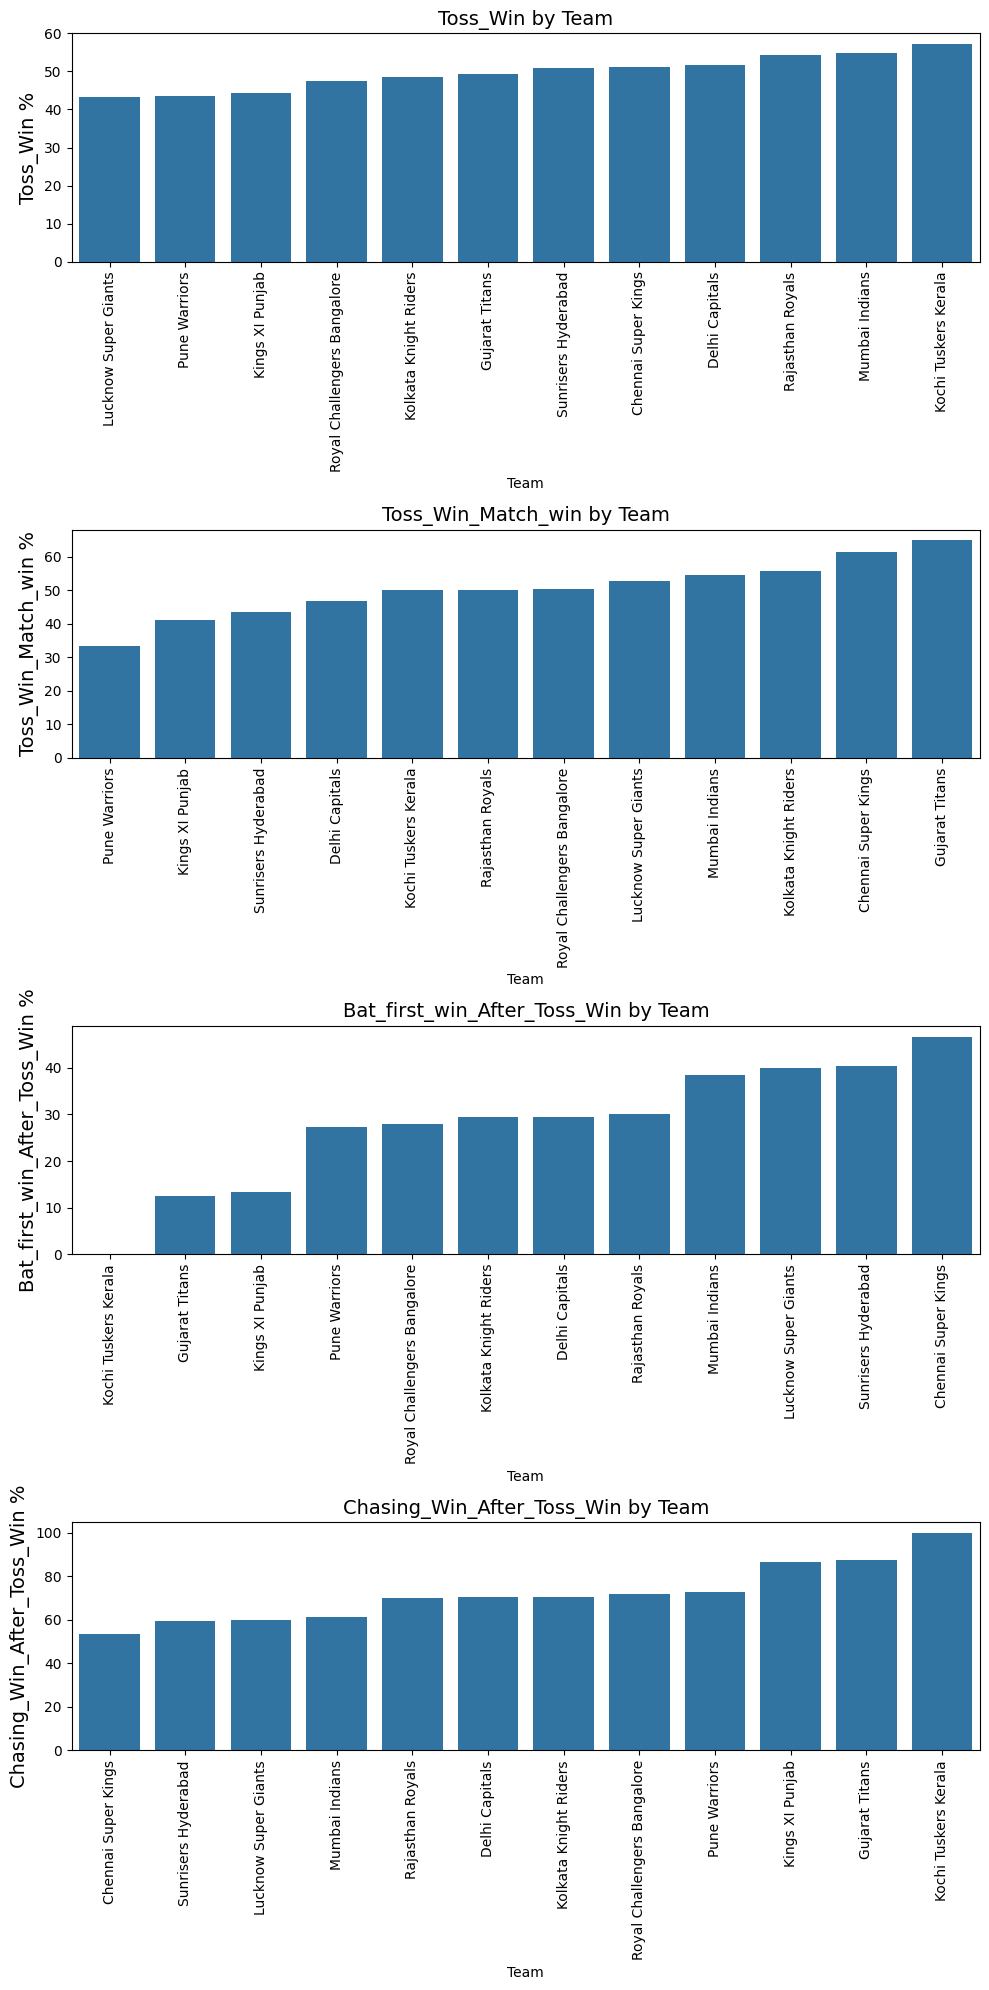

In [41]:
percentage_df2.reset_index(drop=True, inplace=True)

# List of columns to plot
columns_to_plot = ['Toss_Win', 'Toss_Win_Match_win', 'Bat_first_win_After_Toss_Win', 'Chasing_Win_After_Toss_Win']

n_rows = len(columns_to_plot)  
plt.figure(figsize=(10, n_rows * 5))  

# Looping through each column and creating bar plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(n_rows, 1, i + 1)  
    sorted_df = percentage_df2.sort_values(by=col)
    sns.barplot(x='Team', y=col, data=sorted_df)
    plt.title(f'{col} by Team',fontsize=14)  
    plt.xticks(rotation=90)  
    plt.ylabel(f"{col} %", fontsize=14)  
    #plt.xlabel('Team', fontsize=14)  

plt.tight_layout()  
plt.show()  

# **Highest Run Score by Each Team in IPL**

In [42]:
import pandas as pd

#Pivoting data to get the sum of runs for each team per match
pivot_table = pd.pivot_table(
    data=df_del,
    index='match_id',
    columns='batting_team',
    values='total_runs',
    aggfunc='sum',
    fill_value=0
)

#melting the DataFrame to make it tidy
melted_df = pivot_table.reset_index().melt(id_vars='match_id', var_name='batting_team', value_name='total_runs')

#Filtering out rows where total_runs is zero (team did not play)
filtered_df = melted_df[melted_df['total_runs'] > 0]

filtered_df.reset_index(drop=True, inplace=True)


In [43]:
# Displaying the run score of each team for all matches till now 
filtered_df

,match_id,batting_team,total_runs
0,335983,Chennai Super Kings,240
1,335989,Chennai Super Kings,208
2,335993,Chennai Super Kings,152
3,335996,Chennai Super Kings,178
4,336001,Chennai Super Kings,169
...,...,...,...
2182,1426295,Sunrisers Hyderabad,167
2183,1426307,Sunrisers Hyderabad,215
2184,1426309,Sunrisers Hyderabad,159
2185,1426311,Sunrisers Hyderabad,175


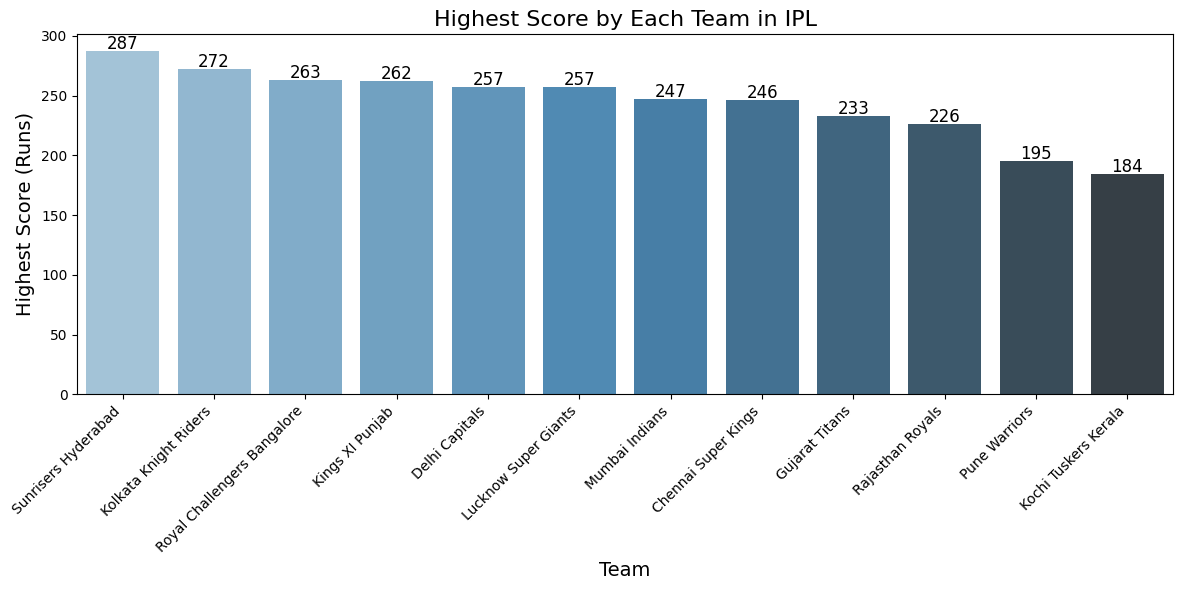

In [44]:
# Fltering highest score for each team
highest_scores = filtered_df.groupby('batting_team')['total_runs'].max().reset_index()

# Sorting by the highest score in descending order
highest_scores_sorted = highest_scores.sort_values(by='total_runs', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))

# Drawinga barplot
sns.barplot(x='batting_team', y='total_runs', data=highest_scores_sorted, palette='Blues_d')

# Adding the score value at the top of each bar
for index, value in enumerate(highest_scores_sorted['total_runs']):
    plt.text(index, value + 2, f'{value}', ha='center', fontsize=12)

# Adding labels and title
plt.xlabel('Team', fontsize=14)
plt.ylabel('Highest Score (Runs)', fontsize=14)
plt.title('Highest Score by Each Team in IPL', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Number of 200+ Runs Innings by Team in IPL**

                          Team  200+ Runs Count
0          Chennai Super Kings               29
1  Royal Challengers Bangalore               28
2              Kings XI Punjab               24
3               Mumbai Indians               23
4          Sunrisers Hyderabad               21
5        Kolkata Knight Riders               21
6             Rajasthan Royals               20
7               Delhi Capitals               16
8               Gujarat Titans                8
9         Lucknow Super Giants                7


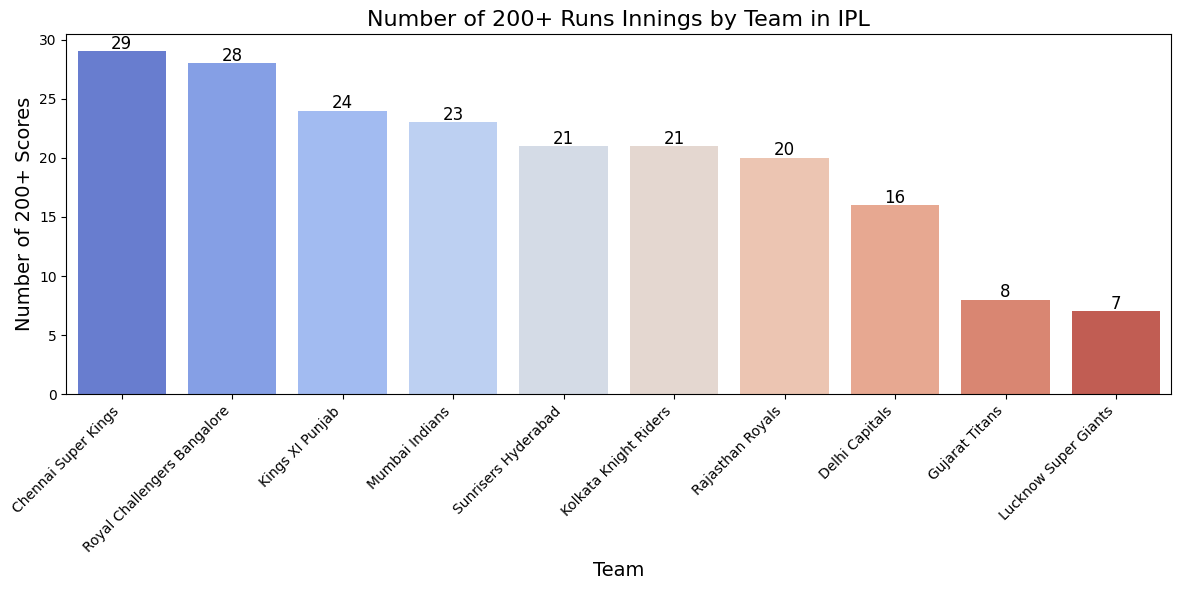

In [45]:
# Filter the data to only include rows where teams scored more than 200 runs
high_scores_df = filtered_df[filtered_df['total_runs'] > 200]

# Counting the number of times each team has scored more than 200 runs
team_200_plus_count = high_scores_df.groupby('batting_team')['total_runs'].count().reset_index()

# Renaming the column for clarity
team_200_plus_count.columns = ['Team', '200+ Runs Count']

# Sorting the result in descending order of the count
team_200_plus_count_sorted = team_200_plus_count.sort_values(by='200+ Runs Count', ascending=False).reset_index(drop=True)

print(team_200_plus_count_sorted)

# Drawing bar plot to visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='200+ Runs Count', data=team_200_plus_count_sorted, palette='coolwarm')

# Adding the count on top of each bar
for index, value in enumerate(team_200_plus_count_sorted['200+ Runs Count']):
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=12)

# Adding labels and title
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of 200+ Scores', fontsize=14)
plt.title('Number of 200+ Runs Innings by Team in IPL', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Trend of 200+ Runs Innings in IPL (2008-2024)**

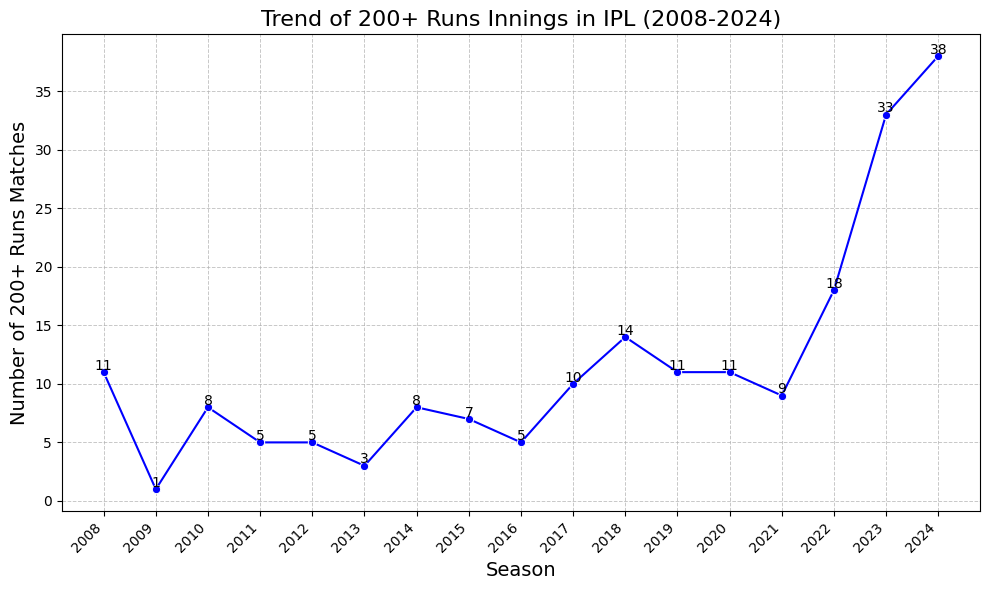

In [46]:
season_df= df_match[['id','season']]  #filtering data from match table for merging 

#merging filtered df and season df on the basis of match id
season_merged= pd.merge(season_df, filtered_df, left_on='id', right_on='match_id',how='inner')
season_merged_filtter= season_merged[season_merged['total_runs']>200]  # filtering only 200+ score row 

#Grouping with season to count the number of 200+ score 
seasonwise200= season_merged_filtter.groupby('season')['total_runs'].count()

# Sorting the seasons in ascending order for proper trend display
seasonwise200_sorted = seasonwise200.sort_index()

plt.figure(figsize=(10, 6))

# Ploting the trend using lineplot
sns.lineplot(x=seasonwise200_sorted.index, y=seasonwise200_sorted.values, marker='o', color='b')

# Adding values on top of the markers
for index, value in enumerate(seasonwise200_sorted.values):
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=10)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Adding labels and title
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of 200+ Runs Matches', fontsize=14)
plt.title('Trend of 200+ Runs Innings in IPL (2008-2024)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Trend of Highest Scores in Each IPL Season (2008-2024)**

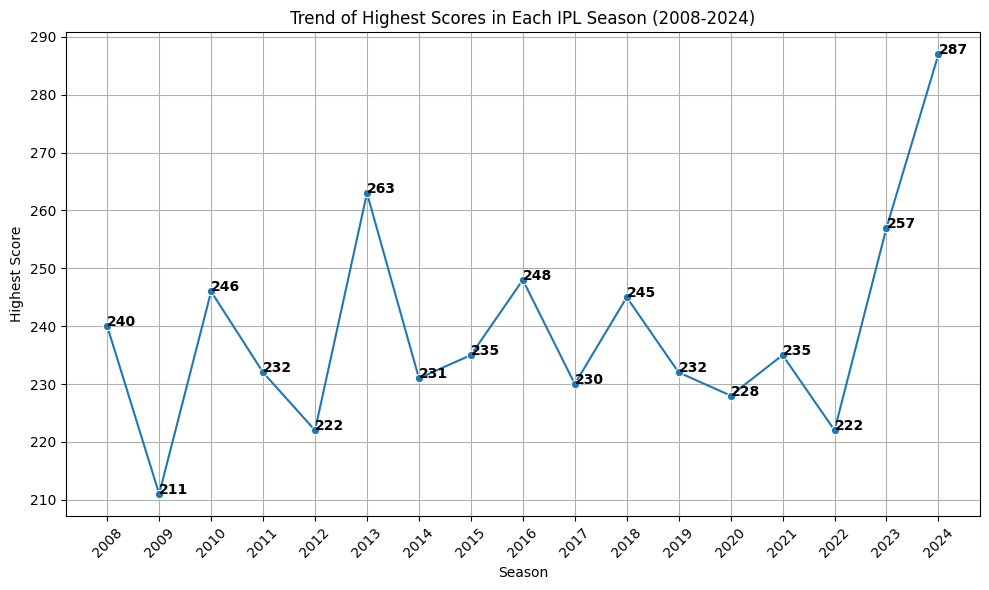

In [47]:
seasonwise_maxscore= season_merged_filtter[['season','total_runs']]
seasonwise_maxscore =seasonwise_maxscore.groupby('season')['total_runs'].max().reset_index()

# Plotting the trend of highest scores in each season
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonwise_maxscore, x='season', y='total_runs', marker='o')

# Showing values on the plot
for index, row in seasonwise_maxscore.iterrows():
    plt.text(row['season'], row['total_runs'], row['total_runs'], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

# Adding titles and labels
plt.title('Trend of Highest Scores in Each IPL Season (2008-2024)')
plt.xlabel('Season')
plt.ylabel('Highest Score')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

# **Team-wise Trend of 200+ Runs Innings in IPL (2008-2024)**

In [48]:
# Grouping by season and batting team to count 200+ run occurrences
team_season_trend = season_merged_filtter.groupby(['season', 'batting_team']).size().reset_index(name='200_plus_runs_count')

# Pivot the data to get teams as columns and seasons as rows
pivot_trend = team_season_trend.pivot(index='season', columns='batting_team', values='200_plus_runs_count').fillna(0)
pivot_trend.head(3)

batting_team,Chennai Super Kings,Delhi Capitals,Gujarat Titans,Kings XI Punjab,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,
2008,3.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,1.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010,1.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0


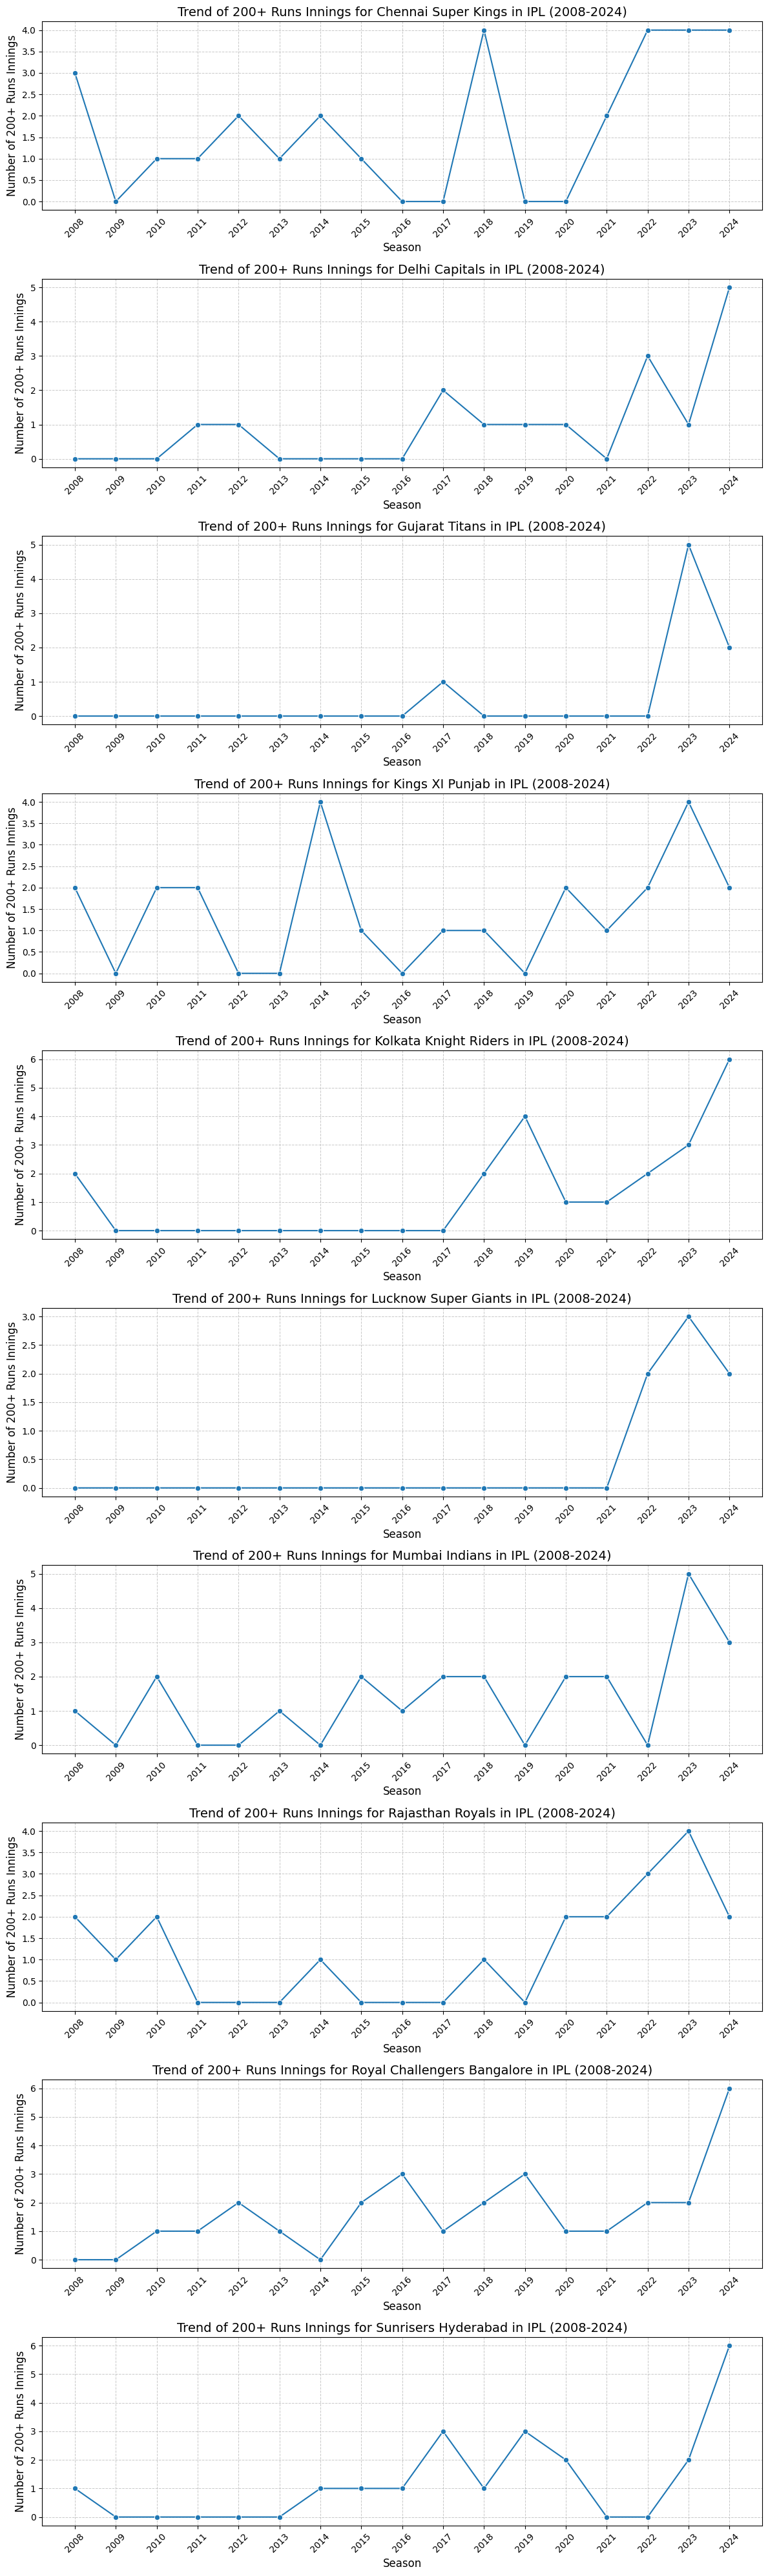

In [49]:
# taking the list of teams
teams = pivot_trend.columns

plt.figure(figsize=(12, len(teams) * 4)) 

# Looping through each team and plot their trend
for i, team in enumerate(teams):
    plt.subplot(len(teams), 1, i + 1)  # Create a subplot for each team
    sns.lineplot(data=pivot_trend[team], marker='o', dashes=False)
    
    # Add grid, labels, and title for each subplot
    plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    plt.title(f'Trend of 200+ Runs Innings for {team} in IPL (2008-2024)', fontsize=14)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Number of 200+ Runs Innings', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# **Teams Scoring the Most Runs in Death Overs (16-20)**

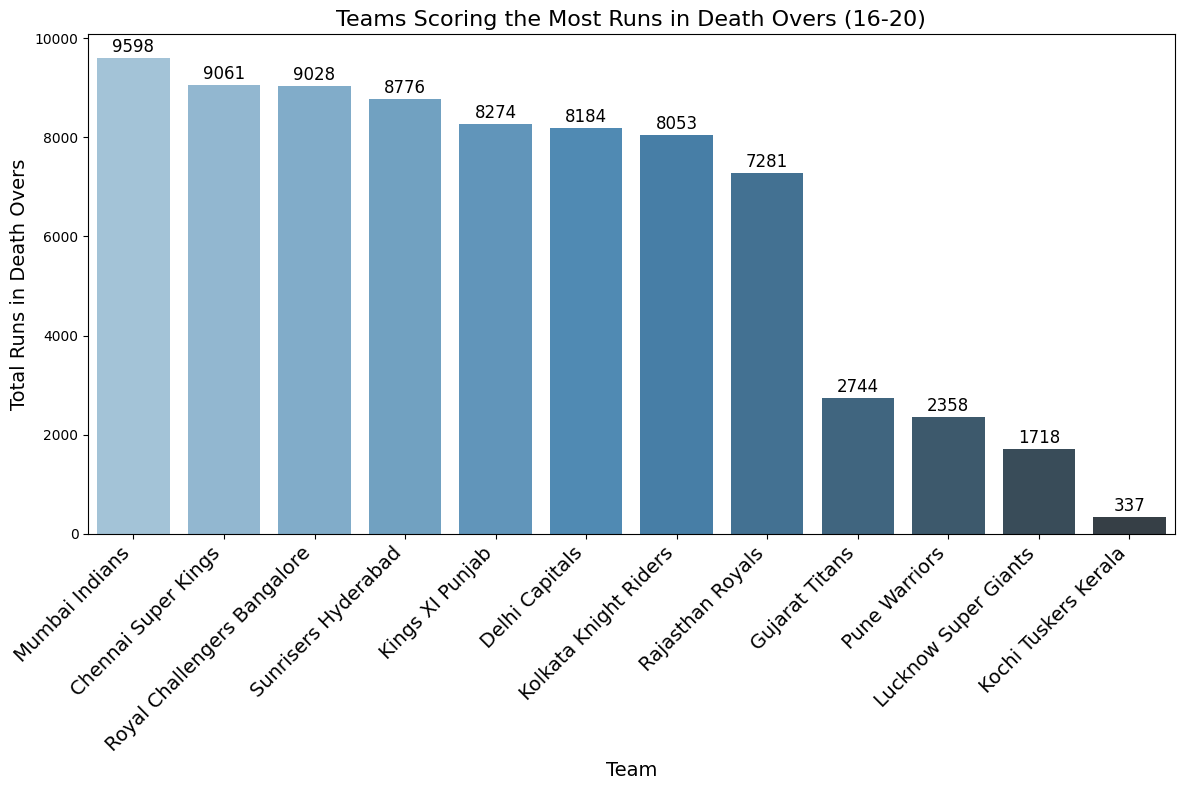

In [50]:
# Filtering the data for death overs (16 to 20)
death_overs = df_del[(df_del['over'] >= 16) & (df_del['over'] <= 20)]

# Grouping by batting team and calculate the total runs scored by each team
team_runs = death_overs.groupby('batting_team')['total_runs'].sum().reset_index(name='death_over_runs')

# Sorting the teams by total runs scored in death overs
top_teams = team_runs.sort_values(by='death_over_runs', ascending=False)

# Plotting graph
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='batting_team', y='death_over_runs', data=top_teams, palette='Blues_d')

# Adding values on top of bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8),
                textcoords='offset points')

# Customizing plot aesthetics
plt.title('Teams Scoring the Most Runs in Death Overs (16-20)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Runs in Death Overs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels
plt.tight_layout()

plt.show()

# **Teams Performance in Death Overs (16-20) A/C Strike Rate**

In [51]:
# Filter the data for the death overs (16 to 20)
death_overs = df_del[(df_del['over'] >= 16) & (df_del['over'] <= 20)]

# Calculate total runs scored by each team in death overs
team_runs = death_overs.groupby('batting_team')['total_runs'].sum().reset_index(name='death_over_runs')

# Calculate total balls faced by each team in death overs (excluding wides and no balls)
valid_balls = death_overs[~death_overs['extras_type'].isin(['wides', 'noballs'])]
team_balls = valid_balls.groupby('batting_team')['ball'].count().reset_index(name='balls_faced')

# Merging the runs and balls data
team_stats = pd.merge(team_runs, team_balls, on='batting_team')

# Calculating the strike rate for each team in death overs
team_stats['strike_rate'] = (team_stats['death_over_runs'] / team_stats['balls_faced']) * 100

# Calculating wickets lost by each team in death overs
wickets_lost = death_overs[death_overs['is_wicket'] == 1].groupby('batting_team')['is_wicket'].count().reset_index(name='wickets_lost')

# Merging the strike rate data with wickets lost data
team_stats = pd.merge(team_stats, wickets_lost, on='batting_team', how='left').fillna(0)

# Sorting by strike rate in descending order to find the best-performing teams under pressure
team_stats = team_stats.sort_values(by='strike_rate', ascending=False).reset_index(drop=True)
# Displaying the team stats 
team_stats


,batting_team,death_over_runs,balls_faced,strike_rate,wickets_lost
0,Lucknow Super Giants,1718,938,183.155650,78
1,Chennai Super Kings,9061,5003,181.111333,378
2,Royal Challengers Bangalore,9028,5037,179.233671,459
3,Mumbai Indians,9598,5386,178.202748,512
4,Gujarat Titans,2744,1543,177.835386,139
5,Kolkata Knight Riders,8053,4748,169.608256,445
6,Delhi Capitals,8184,4891,167.327745,421
7,Rajasthan Royals,7281,4414,164.952424,406
8,Kings XI Punjab,8274,5077,162.970258,474
9,Sunrisers Hyderabad,8776,5388,162.880475,552


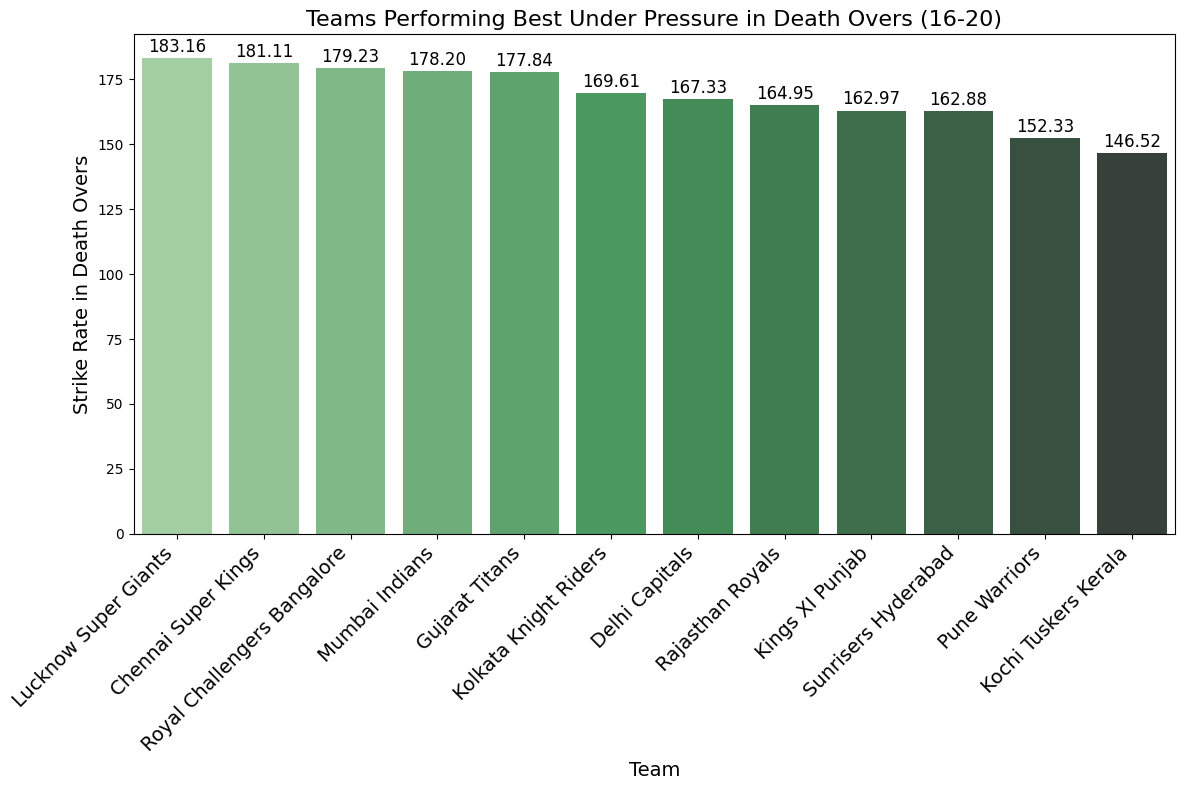

In [52]:
# Plotting the results
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='batting_team', y='strike_rate', data=team_stats, palette='Greens_d')

# Adding values on top of bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8),
                textcoords='offset points')

# Customizing plot
plt.title('Teams Performing Best Under Pressure in Death Overs (16-20)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Strike Rate in Death Overs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

# **PLAYERS ANALYSIS : BATSMAN**

# **Players with Most Player of the Match Awards**

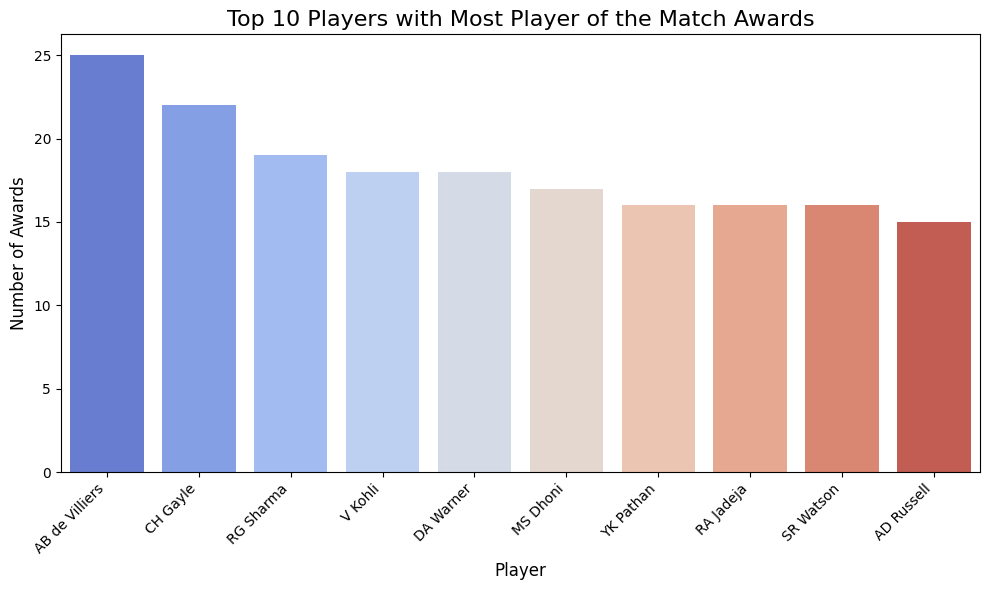

In [53]:
#players have won the most 'Player of the Match' awards
df_match['player_of_match'].value_counts().head() #Top 5 

# Ploting Top 10 Players with Most Player of the Match Awards
player_counts = df_match['player_of_match'].value_counts().head(10)  

# Creating a bar plot
plt.figure(figsize=(10, 6))  
sns.barplot(x=player_counts.index, y=player_counts.values, palette='coolwarm')

# Adding titles and labels
plt.title('Top 10 Players with Most Player of the Match Awards', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

# **Top 10 Players with Most Runs in IPL History**

In [ ]:
player_runs = df_del[['batter', 'batsman_runs']]
player_runs = player_runs.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')

# Sorting the players by total runs
top_players = player_runs.sort_values(by='total_runs', ascending=False).head(10)

print(top_players.reset_index(drop=True))

# Plotting the data
plt.figure(figsize=(12, 6))  
bar_plot = sns.barplot(data=top_players, x='batter', y='total_runs', palette='viridis')

# # Adding titles and labels
plt.title('Top 10 Players with Most Runs in IPL History', fontsize=14)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

NameError: name 'df_del' is not defined

# **Top 10 Players with Most Sixes in IPL History**

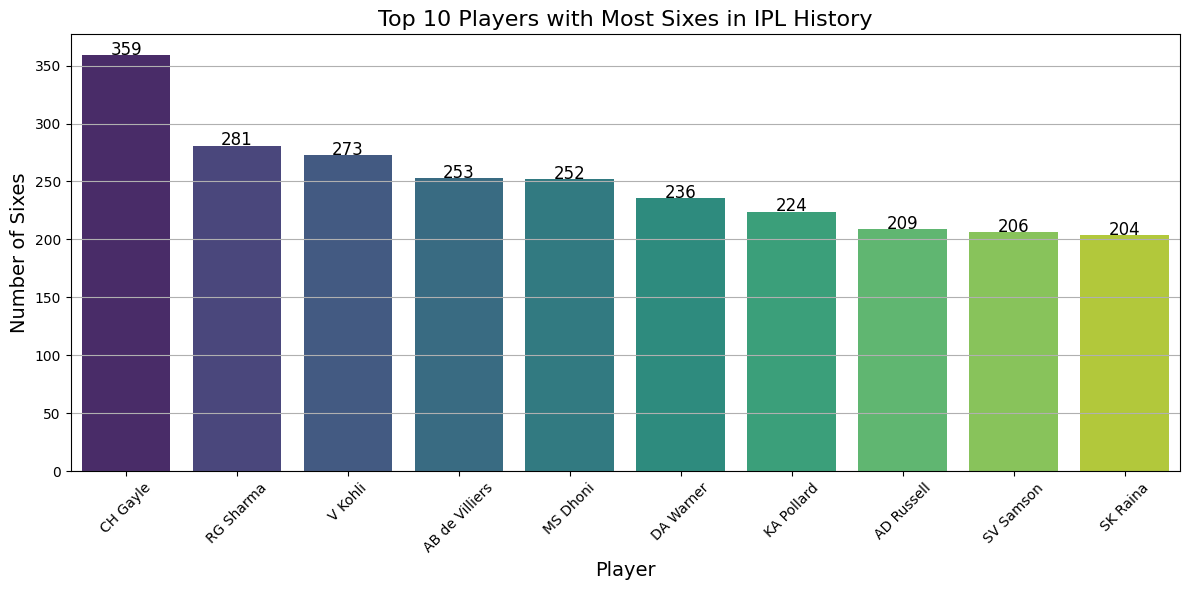

In [55]:
most_sixes = df_del[df_del['batsman_runs'] == 6]['batter'].value_counts().head(10)
most_sixes_df = most_sixes.reset_index()
most_sixes_df.columns = ['batter', 'sixes']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_sixes_df, x='batter', y='sixes', palette='viridis')
for index, row in most_sixes_df.iterrows():
    bar_plot.text(index, row.sixes + 0.1, row.sixes, color='black', ha="center", fontsize=12)

# Adding titles and labels
plt.title('Top 10 Players with Most Sixes in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Sixes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# **Top 10 Players with Most Fours in IPL History**

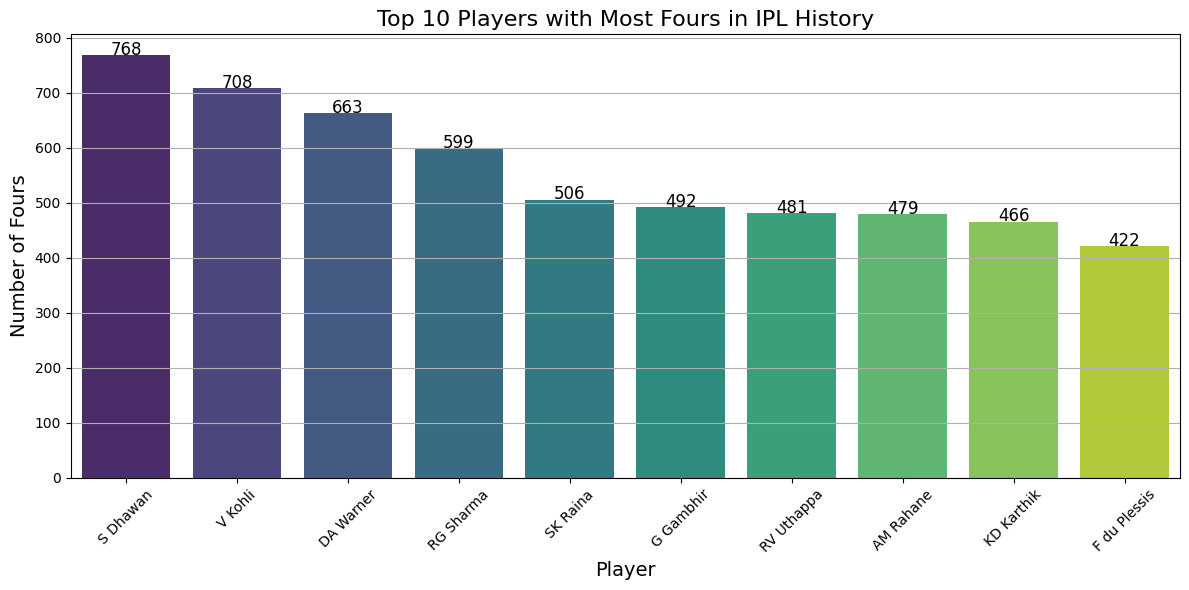

In [56]:
most_fours = df_del[df_del['batsman_runs'] == 4]['batter'].value_counts().head(10)
most_fours_df = most_fours.reset_index()
most_fours_df.columns = ['batter', 'fours']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_fours_df, x='batter', y='fours', palette='viridis')
for index, row in most_fours_df.iterrows():
    bar_plot.text(index, row.fours + 0.1, row.fours, color='black', ha="center", fontsize=12)

# Adding titles and labels
plt.title('Top 10 Players with Most Fours in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Fours', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# **Top 10 Players with Most Three Runs in IPL History**

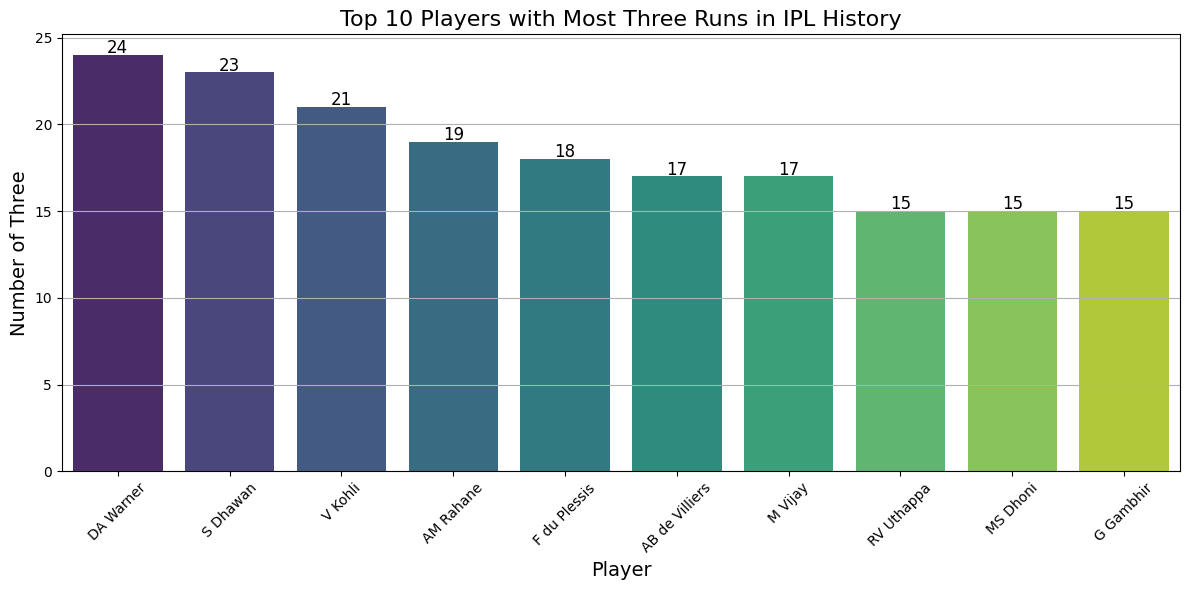

In [57]:
most_three = df_del[df_del['batsman_runs'] == 3]['batter'].value_counts().head(10)
most_three_df = most_three.reset_index()
most_three_df.columns = ['batter', 'three']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_three_df, x='batter', y='three', palette='viridis')
for index, row in most_three_df.iterrows():
    bar_plot.text(index, row.three + 0.1, row.three, color='black', ha="center", fontsize=12)

# Adding titles and labels
plt.title('Top 10 Players with Most Three Runs in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Three', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# **Players with 25+ Matches Played and Their Average Run**

In [58]:
#Objective: batsmen have the highest average runs per match?
batter_data= df_del[['match_id','batter','batsman_runs']]  # Filtering Relevent Data

#Calculating the number of matches each batsman has played
batter_matches = batter_data.groupby('batter')['match_id'].nunique().reset_index(name='matches_played')

#Calculating the total runs for each batsman
batter_total_runs = batter_data.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')

#Merging the matches played and total runs dataframes
batter_summary = pd.merge(batter_matches, batter_total_runs, on='batter')

#Calculating the average runs per match
batter_summary['Avg_runs'] = batter_summary['total_runs'] / batter_summary['matches_played']

#Filtering data for players who have played a minimum of 25 matches in the IPL for a fair comparison 
batter_summary = batter_summary[batter_summary['matches_played']>=25]

# Sorting the batsmen by average runs in descending order
batter_avg = batter_summary.sort_values(by='Avg_runs', ascending=False).reset_index(drop=True)

# Displaying the result
batter_avg

,batter,matches_played,total_runs,Avg_runs
0,B Sai Sudharsan,25,1034,41.360000
1,KL Rahul,122,4689,38.434426
2,LMP Simmons,29,1079,37.206897
3,RD Gaikwad,65,2380,36.615385
4,SE Marsh,69,2489,36.072464
...,...,...,...,...
166,Z Khan,27,117,4.333333
167,UT Yadav,48,208,4.333333
168,JJ Bumrah,26,68,2.615385
169,Sandeep Sharma,25,54,2.160000


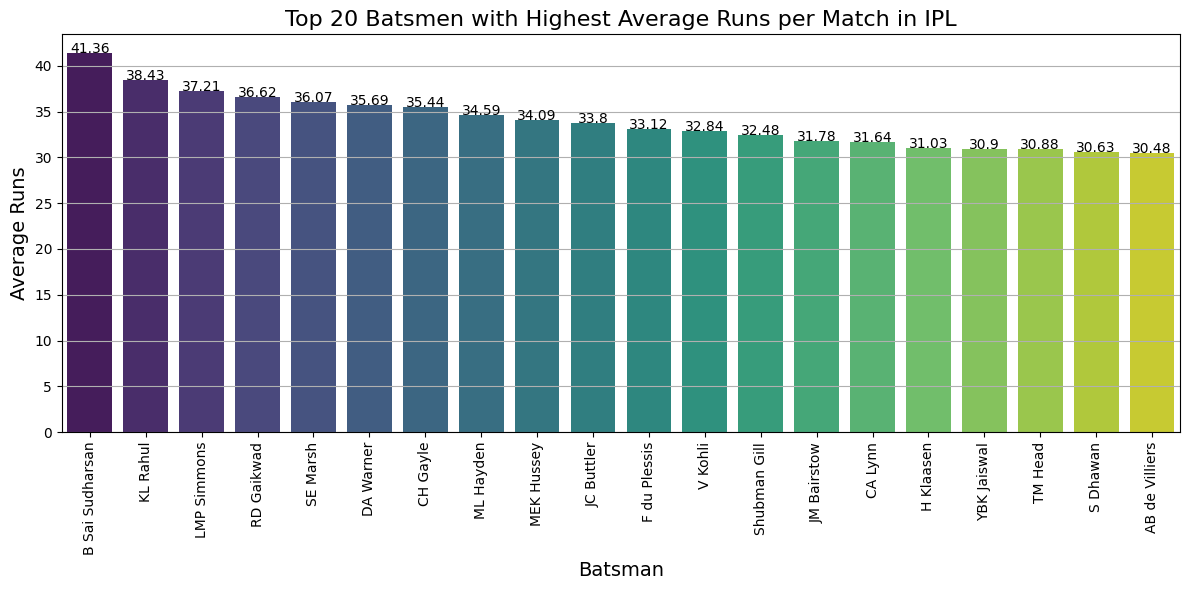

In [59]:
#Plotting the data for top 20 batsmen with the highest average runs
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=batter_avg.head(20), x='batter', y='Avg_runs', palette='viridis')

#Annotating the bars with average runs
for index, row in batter_avg.head(20).iterrows():
    bar_plot.text(index, row.Avg_runs, round(row.Avg_runs, 2), color='black', ha="center")

# Adding titles and labels
plt.title('Top 20 Batsmen with Highest Average Runs per Match in IPL', fontsize=16)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Top Batsmen with Highest Strike Rates in Death Overs(16-20)**

**Considering only who faced at least 150 balls in death over for fare comparison**

In [60]:
# Filtering data for final overs (overs 16 to 20)
final_overs_data = df_del[(df_del['over'] >= 16) & (df_del['over'] < 20)]

# Calculating runs and balls faced by each batsman in the death overs
batsman_stats = final_overs_data.groupby('batter').agg(
    runs_scored=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

# Filtering batsmen who have faced at least 150 balls for dare comparison 
batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 150]

# Calculating strike rate
batsman_stats['strike_rate'] = (batsman_stats['runs_scored'] / batsman_stats['balls_faced']) * 100

# Sorting by strike rate in descending order
top_strike_rates = batsman_stats.sort_values(by='strike_rate', ascending=False).reset_index(drop=True)

# Displaying the top batsmen with the highest strike rates in final overs
top_15_strike_rates = top_strike_rates.head(15)

top_15_strike_rates

,batter,runs_scored,balls_faced,strike_rate
0,AB de Villiers,1421,635,223.779528
1,RR Pant,626,318,196.855346
2,CH Gayle,404,209,193.301435
3,V Kohli,1099,571,192.469352
4,JH Kallis,303,159,190.566038
5,H Klaasen,306,161,190.062112
6,F du Plessis,416,220,189.090909
7,RG Sharma,1176,625,188.160000
8,SA Yadav,516,276,186.956522
9,AD Russell,1065,570,186.842105


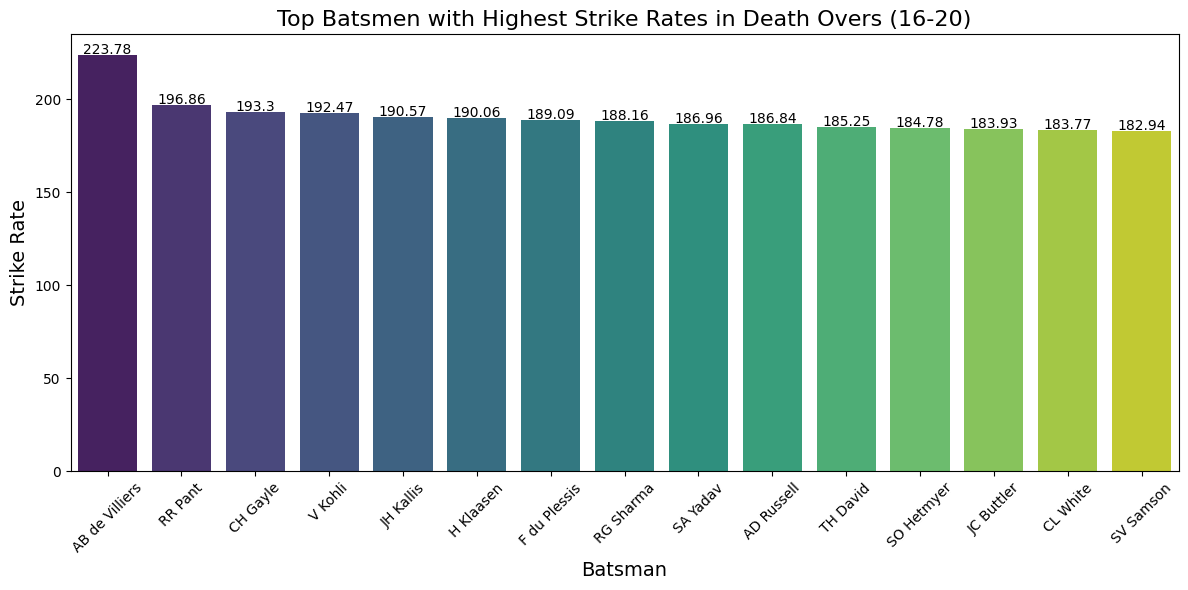

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_strike_rates, x='batter', y='strike_rate', palette='viridis')

# Adding title and labels
plt.title('Top Batsmen with Highest Strike Rates in Death Overs (16-20)', fontsize=16)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Strike Rate', fontsize=14)
plt.xticks(rotation=45)

# Adding value on top of bars
for index, row in top_15_strike_rates.iterrows():
    plt.text(index, row['strike_rate'] + 0.5, round(row['strike_rate'], 2), color='black', ha='center')

plt.tight_layout()
plt.show()

# **Top Batsmen Strike Rates in Powerplay (First 6 Overs)')**

**Considering only who faced at least 150 balls in powerplay over for fare comparison**

In [62]:
# Filtering for the first 6 overs
powerplay_data = df_del[df_del['over'] < 6]

# Calculating total runs and balls faced by each batsman
batsman_stats = powerplay_data.groupby('batter').agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    balls_faced=pd.NamedAgg(column='ball', aggfunc='count')
).reset_index()

# Calculating strike rate
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

# Filtering batsmen who faced at least 150 balls for fare comparison 
batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 150]

# Sorting by strike rate
top_strike_rates_powerplay = batsman_stats.sort_values(by='strike_rate', ascending=False).reset_index(drop=True)

# Display the top batsmen with the highest strike rates in powerplay
top_strike_rates_powerplay=top_strike_rates_powerplay.head(15)  # Adjust the number to show more batsmen if needed
top_strike_rates_powerplay

,batter,total_runs,balls_faced,strike_rate
0,TM Head,412,211,195.260664
1,PD Salt,404,242,166.942149
2,SP Narine,946,577,163.951473
3,Abhishek Sharma,758,501,151.297405
4,YBK Jaiswal,1009,677,149.039882
5,MJ Lumb,225,157,143.312102
6,JM Bairstow,864,606,142.574257
7,P Simran Singh,499,350,142.571429
8,PP Shaw,1347,946,142.389006
9,YK Pathan,361,256,141.015625


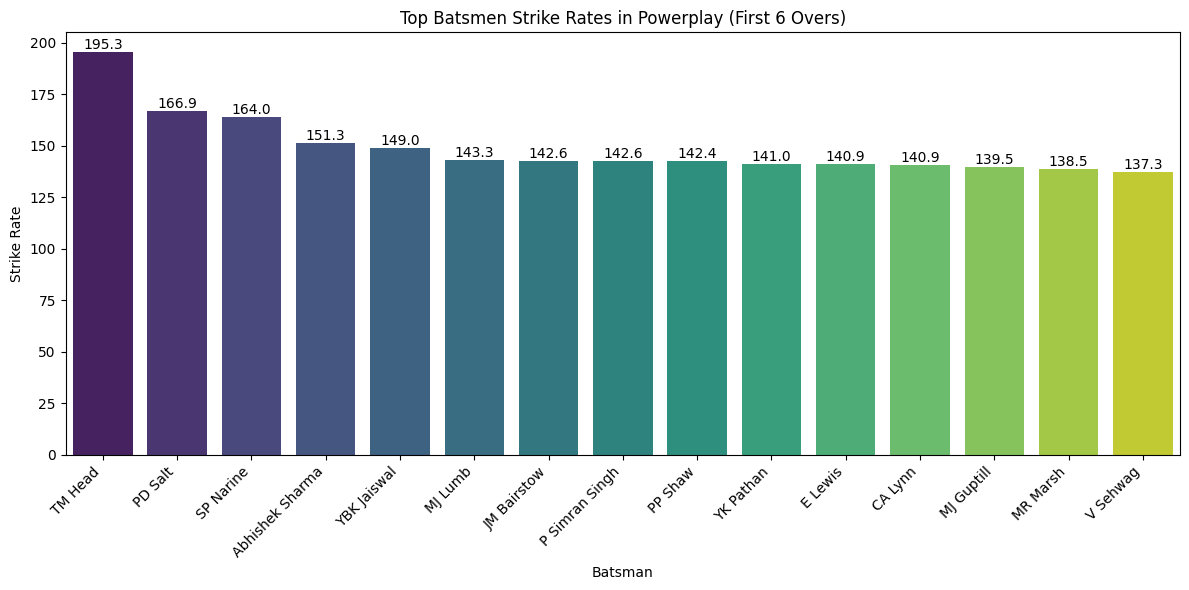

In [63]:
 #Plotting Graph 
plt.figure(figsize=(12, 6))
sns.barplot(data=top_strike_rates_powerplay, x='batter', y='strike_rate', palette='viridis')
plt.title('Top Batsmen Strike Rates in Powerplay (First 6 Overs)')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45, ha='right')

# Adding values on top of bars
for index, value in enumerate(top_strike_rates_powerplay['strike_rate']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Strike Rate Comparison of Virat Kohli and Rohit Sharma in Powerplay and Death Overs**

In [65]:
#creating function for Comparing strike rate of two batsman in powerplay and death over 
def compare_batsmen_strike_rate(batsman1, batsman2):
    # Using the existing DataFrame df_del
    df = df_del.copy()

    # Filter for powerplay (overs 1-6) and death overs (overs 16-20)
    powerplay_data = df[(df['over'] >= 0) & (df['over'] < 6) & (df['batter'].isin([batsman1, batsman2]))]
    death_data = df[(df['over'] >= 16) & (df['over'] < 20) & (df['batter'].isin([batsman1, batsman2]))]

    # Calculate strike rates for powerplay
    powerplay_stats = powerplay_data.groupby('batter').agg(
        runs=('batsman_runs', 'sum'),
        balls=('ball', 'count')
    ).reset_index()
    powerplay_stats['strike_rate'] = (powerplay_stats['runs'] / powerplay_stats['balls']) * 100

    # Calculate strike rates for death overs
    death_stats = death_data.groupby('batter').agg(
        runs=('batsman_runs', 'sum'),
        balls=('ball', 'count')
    ).reset_index()
    death_stats['strike_rate'] = (death_stats['runs'] / death_stats['balls']) * 100

    # Merge both stats for comparison
    comparison_df = pd.merge(
        powerplay_stats[['batter', 'strike_rate']],
        death_stats[['batter', 'strike_rate']],
        on='batter', 
        how='outer',
        suffixes=('_powerplay', '_death')
    ).fillna(0)  # Fill NaN values with 0

    # Filter for the specified batsmen
    comparison_df = comparison_df[comparison_df['batter'].isin([batsman1, batsman2])]

    # Plotting
    bar_width = 0.35
    x = range(len(comparison_df))

    plt.figure(figsize=(12, 6))

    # Plotting Powerplay strike rates
    plt.bar(x, comparison_df['strike_rate_powerplay'], width=bar_width, label='Powerplay Strike Rate', alpha=0.7)

    # Plotting Death strike rates
    plt.bar([p + bar_width for p in x], comparison_df['strike_rate_death'], width=bar_width, label='Death Strike Rate', alpha=0.7)

    # Adding values on top of the bars
    for index, row in comparison_df.iterrows():
        plt.text(index, row['strike_rate_powerplay'], round(row['strike_rate_powerplay'], 2), ha='center', va='bottom')
        plt.text(index + bar_width, row['strike_rate_death'], round(row['strike_rate_death'], 2), ha='center', va='bottom')

    # Configuring the plot
    plt.title(f'Strike Rate Comparison of {batsman1} and {batsman2}',fontsize=14)
    plt.xlabel('Batter')
    plt.ylabel('Strike Rate (%)',fontsize=14)
    plt.xticks([p + bar_width / 2 for p in x], comparison_df['batter'], fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

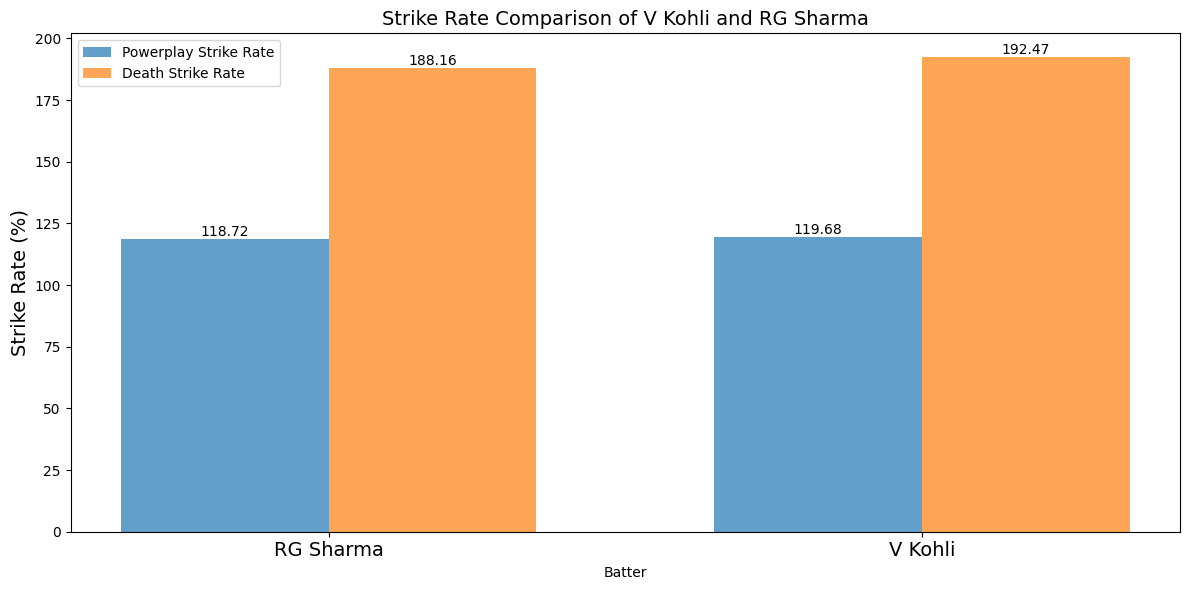

In [66]:
# Comparing Virat Kohli and Rohit Sharma Strike rate 
compare_batsmen_strike_rate('V Kohli', 'RG Sharma')

# **PLAYERS ANALYSIS : BOWLERS**

# **Top 10 Wicket-Takers in IPL History**

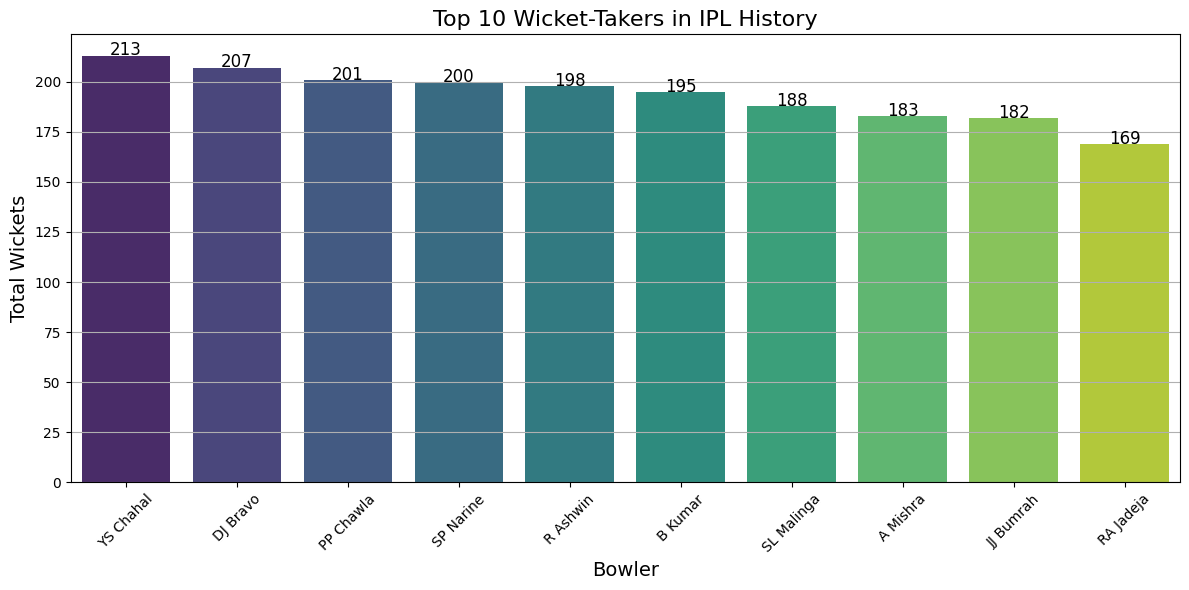

In [67]:
most_wicket_taker = df_del[['bowler', 'is_wicket']]
most_wicket_taker = most_wicket_taker.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wicket')
most_wicket_taker = most_wicket_taker.sort_values(by='total_wicket', ascending=False).reset_index(drop=True)

#top 10 wicket-takers
top_wicket_takers = most_wicket_taker.head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_wicket_takers, x='bowler', y='total_wicket', palette='viridis')

# Annotate the bars with total wickets
for index, row in top_wicket_takers.iterrows():
    bar_plot.text(index, row.total_wicket + 0.1, row.total_wicket, color='black', ha="center", fontsize=12)

# Adding titles and labels
plt.title('Top 10 Wicket-Takers in IPL History', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# **Bowlers with 60+ Overs Bowled and Their Economy Rate**

# **Top 15 Most Economical Bowlers**

In [72]:
#Calculating total runs conceded by each bowler
runs_conceded = df_del.groupby('bowler')['batsman_runs'].sum().reset_index(name='runs_conceded')

#Filtering out wides and no balls and calculating total overs bowled by each bowler
#Only counting legitimate deliveries - excluding wides and no balls
valid_deliveries = df_del[~df_del['extras_type'].isin(['wides', 'noballs'])]

# Counting the number of balls bowled for valid deliveries
balls_bowled = valid_deliveries.groupby('bowler')['ball'].count().reset_index(name='balls_bowled')
balls_bowled['overs_bowled'] = balls_bowled['balls_bowled'] / 6

#Merging runs conceded and balls bowled data
bowler_stats = pd.merge(runs_conceded, balls_bowled[['bowler', 'overs_bowled']], on='bowler', how='left')

#Calculating the economy rate
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / bowler_stats['overs_bowled']

#filtring data for those have minimum over bowled 60 for fare comparision 
bowler_stats = bowler_stats[bowler_stats['overs_bowled']>=60]
#Sorting the bowlers by economy rate
most_economical_bowlers = bowler_stats.sort_values(by='economy_rate').reset_index(drop=True)

# Displaying the top bowlers with lowest economy rates
most_economical_bowlers.head(15)

# Display the result
#top_15_most_economical_bowlers.style.set_table_attributes('style="background-color: white;"').set_properties(**{'background-color': 'white'})

,bowler,runs_conceded,overs_bowled,economy_rate
0,A Kumble,1027,160.833333,6.385492
1,M Muralitharan,1642,254.666667,6.447644
2,RE van der Merwe,486,73.833333,6.582393
3,SP Narine,4492,680.166667,6.604264
4,DW Steyn,2406,363.666667,6.615949
5,J Yadav,437,65.000000,6.723077
6,DL Vettori,871,129.500000,6.725869
7,Rashid Khan,3222,478.666667,6.731198
8,MJ Santner,411,61.000000,6.737705
9,J Botha,781,115.666667,6.752161


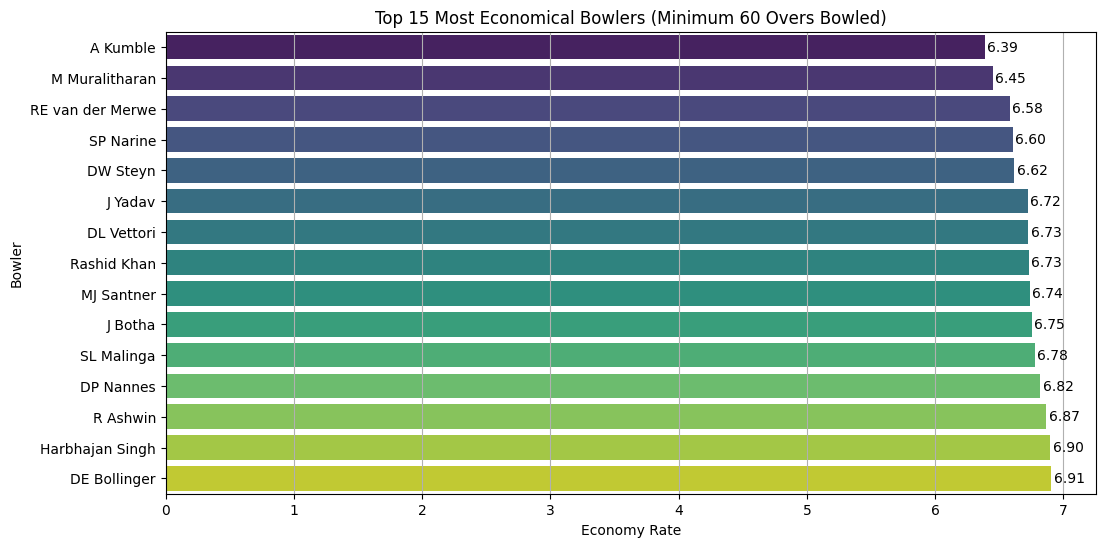

In [73]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_15_most_economical_bowlers, x='economy_rate', y='bowler', palette='viridis')
plt.title('Top 15 Most Economical Bowlers (Minimum 60 Overs Bowled)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.grid(axis='x')

# Annotating bars with their respective values
for index, row in top_15_most_economical_bowlers.iterrows():
    bar_plot.text(row['economy_rate'] + 0.02, index, f"{row['economy_rate']:.2f}", color='black', ha="left", va="center")

plt.show()

# **Top 15 Most Expensive Bowlers in Terms of Economy Rates**

In [78]:
most_expensive_bowlers = bowler_stats.sort_values(by='economy_rate', ascending=False).head(15).reset_index(drop=True)
most_expensive_bowlers.style

,bowler,runs_conceded,overs_bowled,economy_rate
0,Mukesh Kumar,673,66.500000,10.120301
1,Yash Thakur,663,67.333333,9.846535
2,Kartik Tyagi,675,70.333333,9.597156
3,Basil Thampi,828,86.833333,9.535509
4,SM Curran,1847,196.833333,9.383573
5,MP Stoinis,1240,133.833333,9.265255
6,AS Joseph,669,72.333333,9.248848
7,Shahbaz Ahmed,825,89.500000,9.217877
8,CJ Jordan,1033,112.333333,9.195846
9,TU Deshpande,1184,129.000000,9.178295


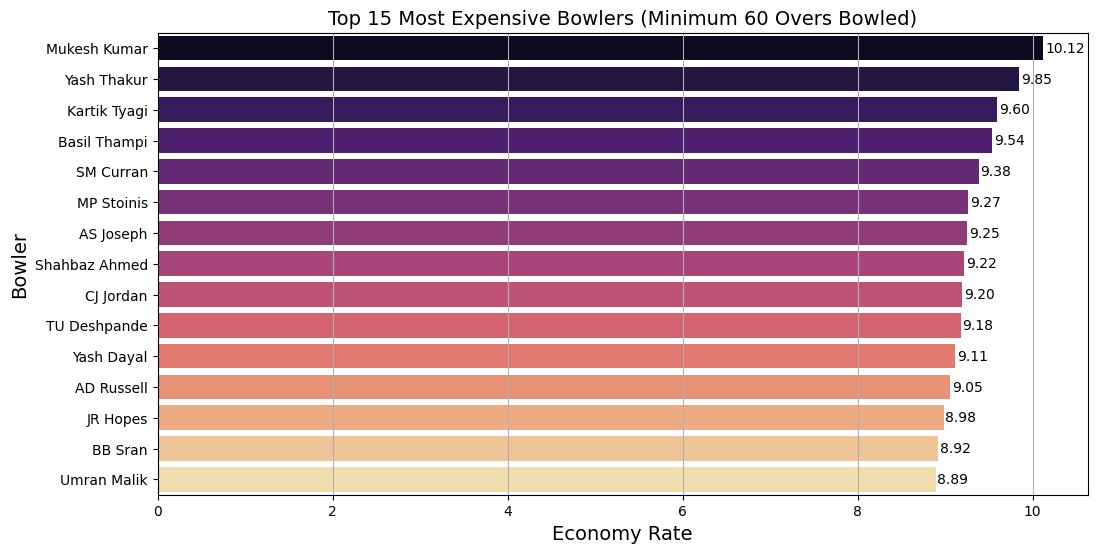

In [79]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_expensive_bowlers, x='economy_rate', y='bowler', palette='magma')
plt.title('Top 15 Most Expensive Bowlers (Minimum 60 Overs Bowled)',fontsize=14)
plt.xlabel('Economy Rate',fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.grid(axis='x')

# Annotating bars with their respective values
for index, row in most_expensive_bowlers.iterrows():
    bar_plot.text(row['economy_rate'] + 0.02, index, f"{row['economy_rate']:.2f}", color='black', ha="left", va="center")

plt.show()

# **Top 15 Bowlers with Most Wickets in Death Overs (16 to 20)**

In [80]:
# Filtering the data for death overs (over 16 to 20)
death_overs = df_del[(df_del['over'] >= 16) & (df_del['over'] <= 20)]

# Grouping by bowler and summing the wickets taken
wickets_in_death_overs = death_overs.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wickets')

# Sorting the bowlers by total wickets in descending order
most_wickets_death_overs = wickets_in_death_overs.sort_values(by='total_wickets', ascending=False)

# Getting the top 15 bowlers with most wickets in death overs
top_bowlers_death_overs = most_wickets_death_overs.head(15).reset_index(drop=True)

# Displayong the result
top_bowlers_death_overs


,bowler,total_wickets
0,DJ Bravo,115
1,SL Malinga,104
2,B Kumar,93
3,JJ Bumrah,89
4,HV Patel,74
5,MM Sharma,72
6,Mohammed Shami,69
7,SP Narine,69
8,CH Morris,61
9,R Vinay Kumar,58


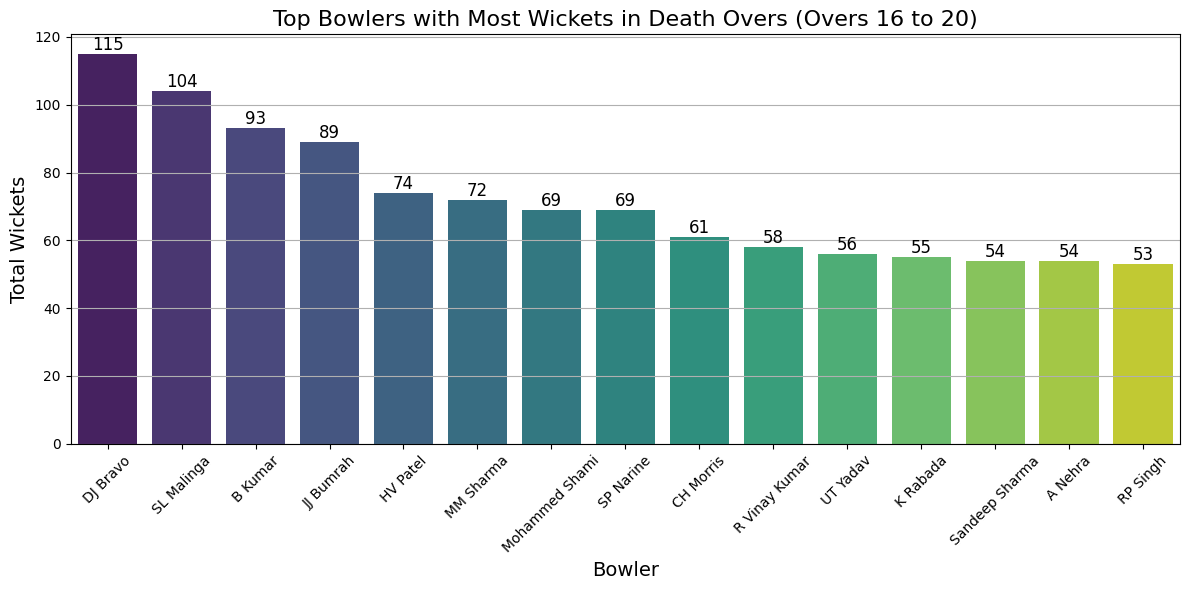

In [81]:
# Plotting the top 15 bowlers who took most wickets in death overs
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_bowlers_death_overs, x='bowler', y='total_wickets', palette='viridis')

# Adding titles and labels
plt.title('Top Bowlers with Most Wickets in Death Overs (Overs 16 to 20)', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding value on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)

plt.tight_layout()
plt.show()

# **Top 15 Bowlers with Most Wickets in Powerplay (Overs 1-6)**

In [82]:
# Filtering data for powerplay overs (overs 0 to 5)
powerplay_data = df_del[(df_del['over'] >= 0) & (df_del['over'] < 6)]

# Counting wickets taken by each bowler in the powerplay
wickets_powerplay = powerplay_data[powerplay_data['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index(name='total_wickets')

# Sorting the bowlers by total wickets taken
top_bowlers_powerplay = wickets_powerplay.sort_values(by='total_wickets', ascending=False).reset_index(drop=True)

# Displaying the top 15 bowlers with the most wickets in powerplay
top_bowlers_powerplay = top_bowlers_powerplay.head(15)
top_bowlers_powerplay


,bowler,total_wickets
0,B Kumar,77
1,TA Boult,63
2,Sandeep Sharma,63
3,UT Yadav,61
4,DL Chahar,60
5,I Sharma,60
6,Z Khan,58
7,R Ashwin,53
8,Mohammed Shami,51
9,DS Kulkarni,46


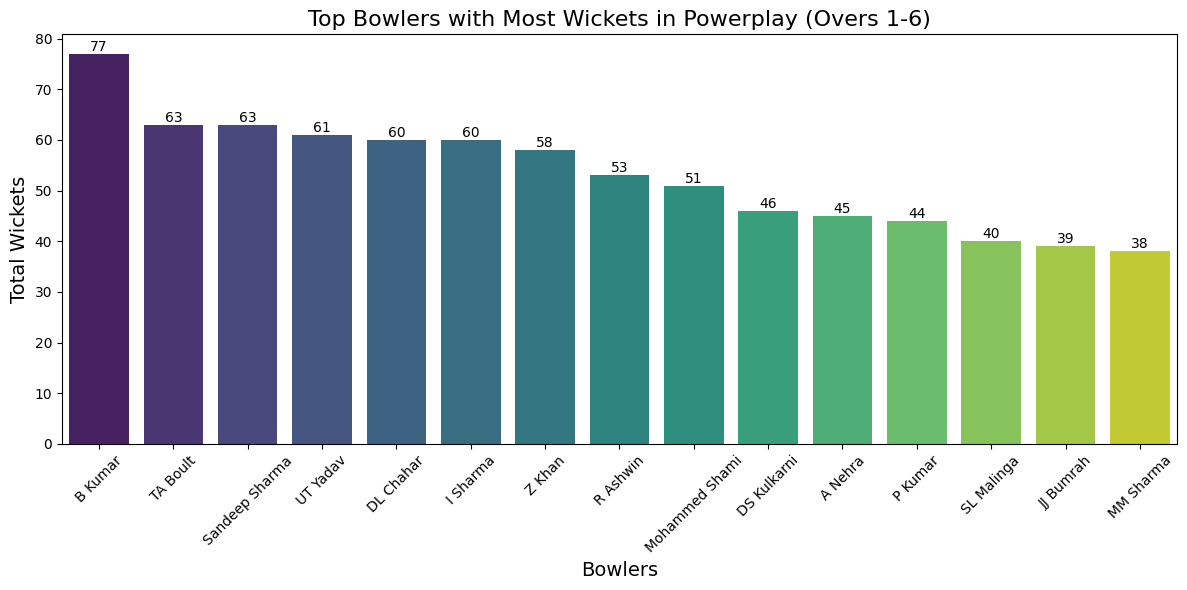

In [83]:
# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='total_wickets', data=top_bowlers_powerplay, palette='viridis')
plt.title('Top Bowlers with Most Wickets in Powerplay (Overs 1-6)', fontsize=16)
plt.xlabel('Bowlers', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)

# Adding the values on top of the bars
for index, value in enumerate(top_bowlers_powerplay['total_wickets']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Wicket Comparison: Jasprit Bumrah vs Bhuvneshwar Kumar (Powerplay vs Death Over)**

In [84]:
#Creating Function for Comparioson of two bowler wicket taker in power play vs Death over 
def plot_bowler_comparison(bowler1, bowler2):
    # Filtering data for powerplay overs (overs 0 to 5)
    powerplay_data = df_del[(df_del['over'] >= 0) & (df_del['over'] < 6)]
    
    # Filtering data for death overs (overs 16 to 20)
    death_over_data = df_del[(df_del['over'] >= 16) & (df_del['over'] < 20)]
    
    # Counting wickets taken by each bowler in powerplay
    wickets_powerplay = powerplay_data[powerplay_data['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index(name='total_wickets')
    
    # Counting wickets taken by each bowler in death overs
    wickets_death = death_over_data[death_over_data['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index(name='total_wickets')
    
    # Merging data for both bowlers
    comparison_data = pd.DataFrame({
        'bowler': [bowler1, bowler2],
        'powerplay_wickets': [wickets_powerplay[wickets_powerplay['bowler'] == bowler1]['total_wickets'].values[0] if bowler1 in wickets_powerplay['bowler'].values else 0,
                              wickets_powerplay[wickets_powerplay['bowler'] == bowler2]['total_wickets'].values[0] if bowler2 in wickets_powerplay['bowler'].values else 0],
        'death_over_wickets': [wickets_death[wickets_death['bowler'] == bowler1]['total_wickets'].values[0] if bowler1 in wickets_death['bowler'].values else 0,
                               wickets_death[wickets_death['bowler'] == bowler2]['total_wickets'].values[0] if bowler2 in wickets_death['bowler'].values else 0]
    })

    # Seting the bar width
    bar_width = 0.35
    
    # Seting position of bar on X axis
    r1 = range(len(comparison_data))
    r2 = [x + bar_width for x in r1]
    
    # Creating the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(r1, comparison_data['powerplay_wickets'], color='blue', width=bar_width, edgecolor='grey', label='Powerplay Wickets')
    plt.bar(r2, comparison_data['death_over_wickets'], color='red', width=bar_width, edgecolor='grey', label='Death Over Wickets')
    
    # Adding title and labels
    plt.title(f'Wicket Comparison: {bowler1} vs {bowler2}', fontsize=16)
    plt.xlabel('Bowlers', fontsize=14)
    plt.ylabel('Total Wickets', fontsize=14)
    plt.xticks([r + bar_width / 2 for r in r1], [bowler1, bowler2])

    # Adding the values on top of the bars
    for index, value in enumerate(comparison_data['powerplay_wickets']):
        plt.text(index, value, str(value), ha='center', va='bottom')
    
    for index, value in enumerate(comparison_data['death_over_wickets']):
        plt.text(index + bar_width, value, str(value), ha='center', va='bottom')

    plt.legend()
    plt.tight_layout()
    plt.show()

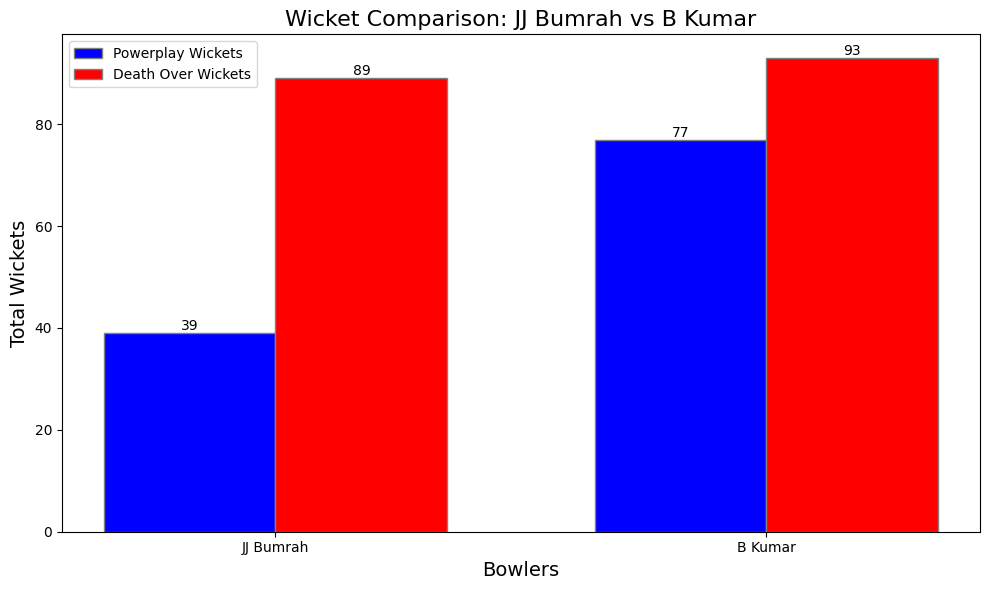

In [85]:
# Calling fuction and giveing parameter value Jasprit Bumrah and Buneshwar Kumar for Comparison 
plot_bowler_comparison('JJ Bumrah', 'B Kumar')

# **Wicket Comparison: Jasprit Bumrah vs Mohammed Shami (Powerplay vs Death Over)**

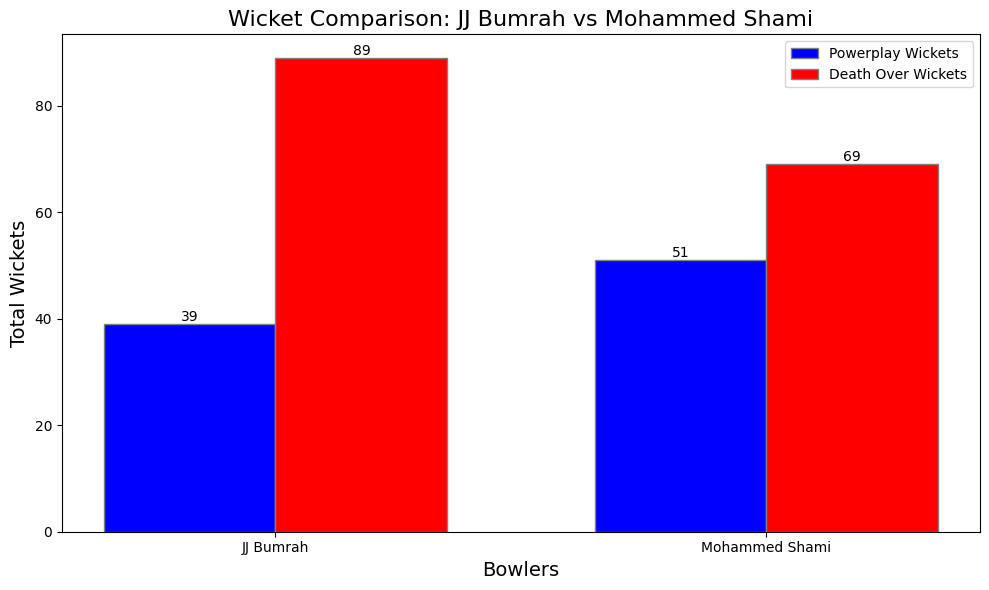

In [86]:
# Calling fuction and giveing parameter value Jasprit Bumrah and Mohammed Shami for Comparison 
plot_bowler_comparison('JJ Bumrah', 'Mohammed Shami')

# **Bowlers Vs Batsman**

# **Top 5 Bowlers Who Dismissed Virat Kohli the Most**

In [88]:
# Creating Function to check which bowler has dismissals most to batsman 
def top_bowlers_dismissing_batsman(batsman_name):
    # Filter the DataFrame for dismissals where the batsman is out
    dismissals = df_del[df_del['player_dismissed'] == batsman_name]

    # Grouping by bowler and count how many times they dismissed the batsman
    bowler_dismissals = dismissals.groupby('bowler').size().reset_index(name='dismissals')

    # Sorting by the number of dismissals and get the top 10 bowlers
    top_5_bowlers = bowler_dismissals.sort_values(by='dismissals', ascending=False).head(10)

    # Plotting graph 
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='bowler', y='dismissals', data=top_5_bowlers, palette='Blues_d')

    # Adding values on top of bars
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=12, xytext=(0, 8),
                    textcoords='offset points')

    # Customizing titles and axis 
    plt.title(f'Top 5 Bowlers Who Dismissed {batsman_name} the Most', fontsize=16)
    plt.xlabel('Bowler', fontsize=14)
    plt.ylabel('Number of Dismissals', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels and adjust font size
    plt.tight_layout()
    plt.show()

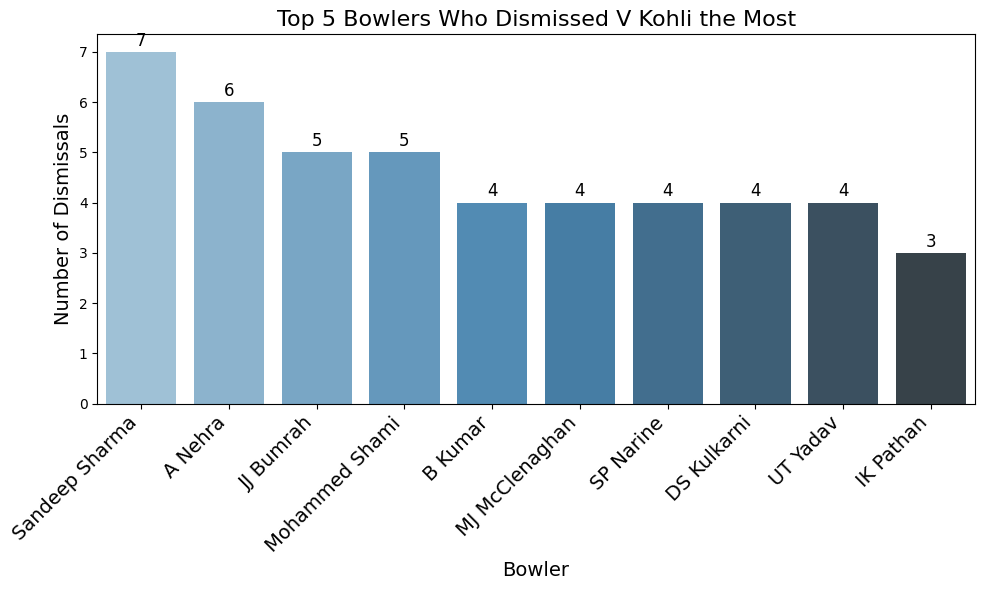

In [89]:
# Checking Dismissals of Virat kohli 
top_bowlers_dismissing_batsman('V Kohli')

# **Top 5 Bowlers Who Dismissed Rogit Sharma the Most**

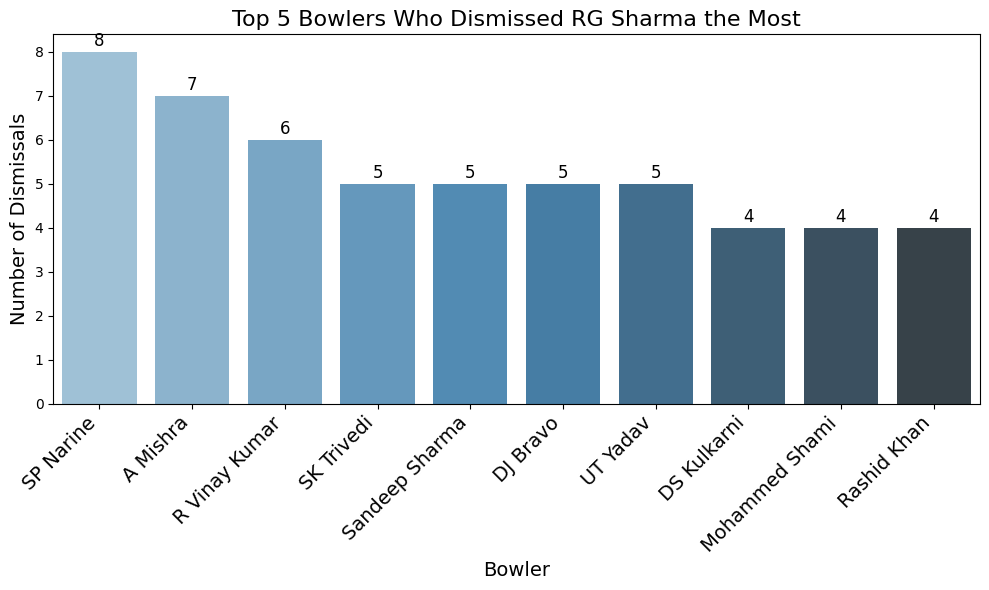

In [90]:
# Checking Dismissals of Rohit Sharma
top_bowlers_dismissing_batsman('RG Sharma')

# **Top 10 Batsmen Scoring Most Runs Against Jasprit Bumrah**

In [91]:
# Creating Function to check most run scorer batsman against Bowler
def top_batsmen_against_bowler(bowler_name):
    # Filter the DataFrame for deliveries bowled by the specific bowler
    deliveries_by_bowler = df_del[df_del['bowler'] == bowler_name]

    # Grouping by batsman and suming the total runs scored against the bowler
    batsman_runs = deliveries_by_bowler.groupby('batter')['batsman_runs'].sum().reset_index(name='runs_scored')

    # Sorting by runs scored and get the top 10 batsmen
    top_10_batsmen = batsman_runs.sort_values(by='runs_scored', ascending=False).head(10)

    # Plotting using seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='batter', y='runs_scored', data=top_10_batsmen, palette='Blues_d')

    # Adding values on top of bars
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=12, xytext=(0, 8),
                    textcoords='offset points')

    # Customizing plot aesthetics
    plt.title(f'Top 10 Batsmen Scoring Most Runs Against {bowler_name}', fontsize=16)
    plt.xlabel('Batsman', fontsize=14)
    plt.ylabel('Runs Scored', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels and adjust font size
    plt.tight_layout()
    plt.show()

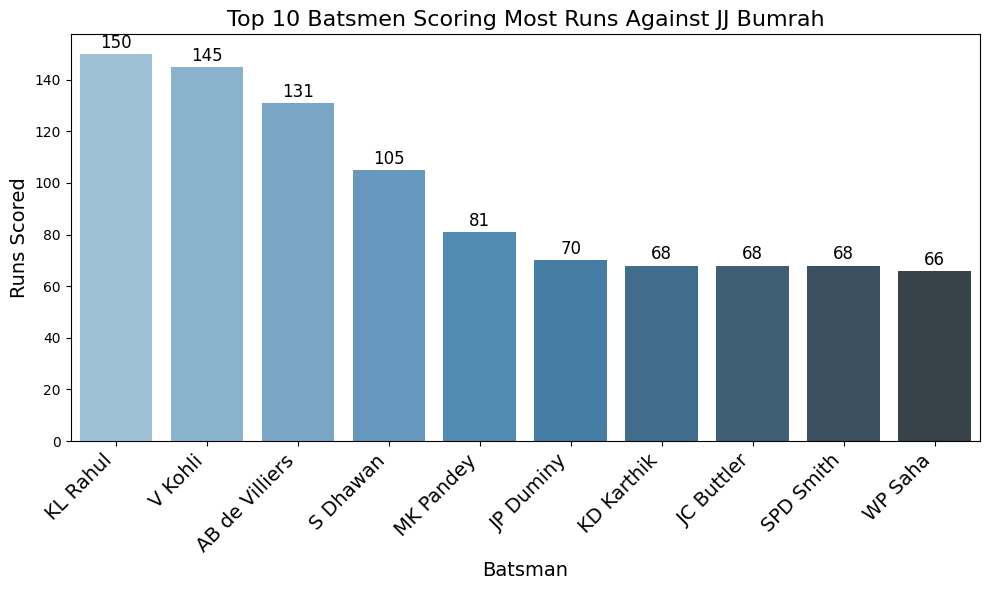

In [92]:
# Checking Most run scorer batsman against Jasprit Bumrah 
top_batsmen_against_bowler('JJ Bumrah')

# **Top 10 Batsmen Scoring Most Runs Against Mohammed Shami**

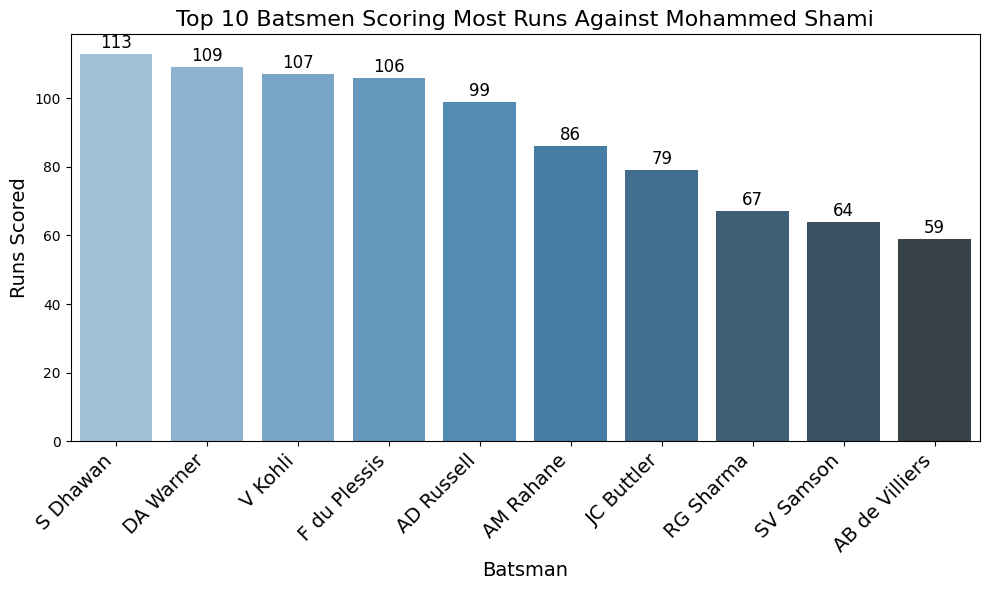

In [93]:
# Checking Most run scorer batsman against Mohammed Shami
top_batsmen_against_bowler('Mohammed Shami')

# **Top 10 Batsmen Scoring Most Runs Against Bhuvneshwar Kumar**

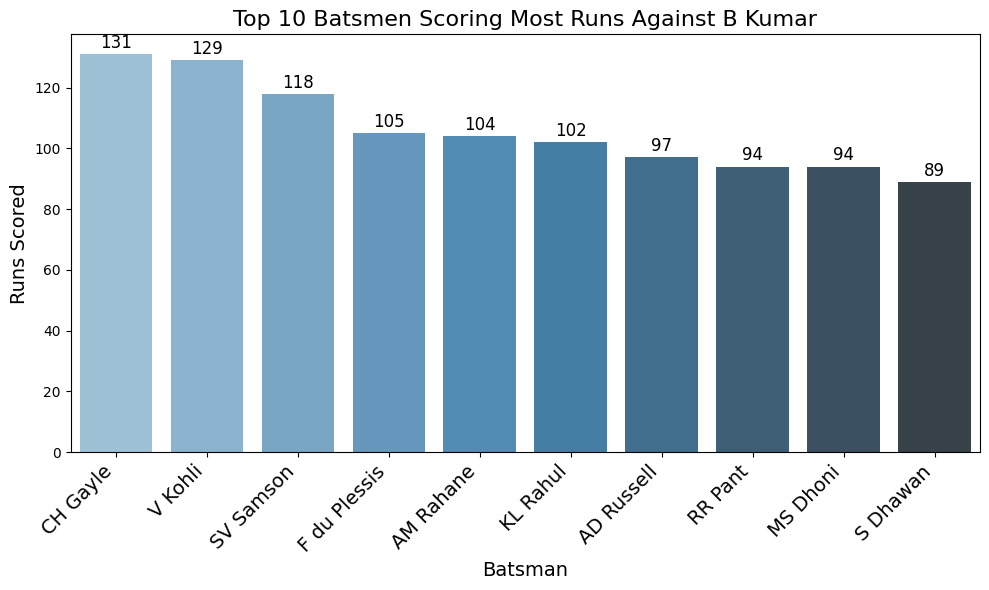

In [94]:
# Checking Most run scorer batsman against Bhuvneshwar Kumar 
top_batsmen_against_bowler('B Kumar')

# **Fielding Analysis**

# **Most Dismissal Types**

In [95]:
# Filtering the data for deliveries where a wicket was taken
dismissals = df_del[df_del['is_wicket'] == 1]

# Grouping by dismissal type and count the number of each type
dismissal_counts = dismissals.groupby('dismissal_kind')['is_wicket'].count().reset_index(name='count')

# Sorting the dismissal types by their count in descending order
dismissal_counts = dismissal_counts.sort_values(by='count', ascending=False)
#dismissal_counts

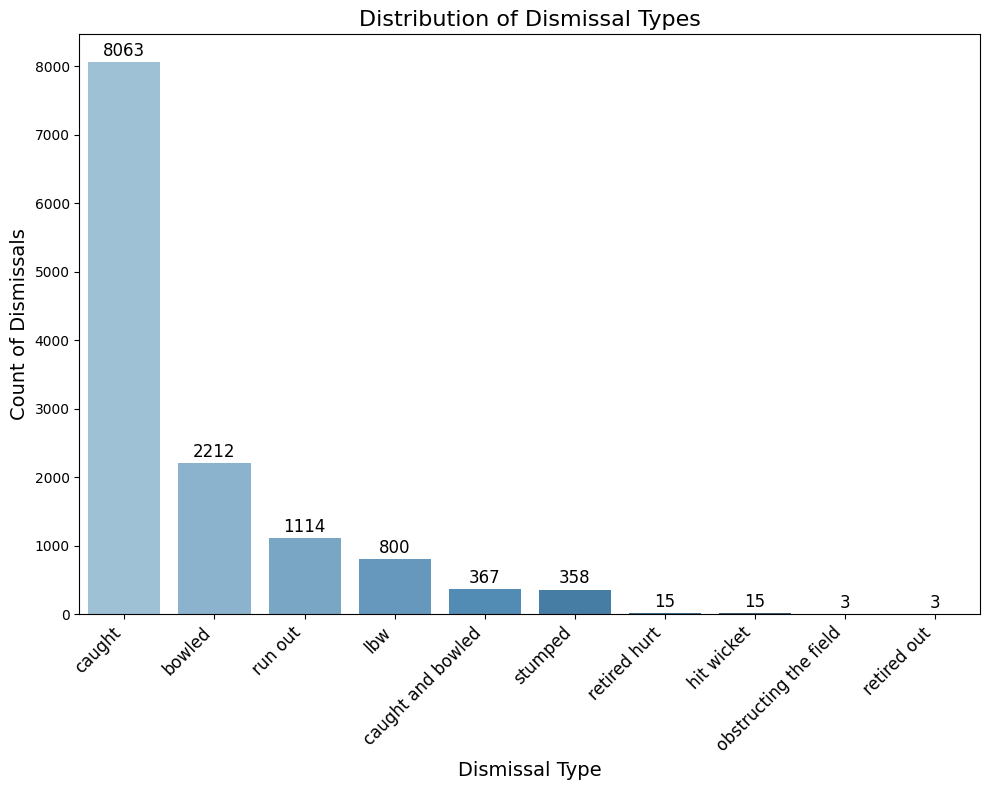

In [96]:
# Plotting the distribution of dismissal types
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='dismissal_kind', y='count', data=dismissal_counts, palette='Blues_d')

# Adding values on top of bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8),
                textcoords='offset points')


plt.title('Distribution of Dismissal Types', fontsize=16)
plt.xlabel('Dismissal Type', fontsize=14)
plt.ylabel('Count of Dismissals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.tight_layout()
plt.show()